In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns
import missingno as msno
import warnings
from sklearn.preprocessing import LabelEncoder
from sklearn import preprocessing
from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.preprocessing import StandardScaler
from sklearn import linear_model
from sklearn.linear_model import LogisticRegressionCV
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn import svm
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.model_selection import learning_curve
from sklearn.metrics import precision_recall_curve
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report, accuracy_score
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, auc
import matplotlib.pyplot as plt
warnings.filterwarnings('ignore')

In [ ]:
print('Numpy Version',np.__version__)
print('Pandas Version',pd.__version__)
print('Seaborn Version',sns.__version__)

Numpy Version 1.26.4
Pandas Version 2.1.4
Seaborn Version 0.13.1


In [ ]:
# Loading the Data set in the dataframe
rdf = pd.read_csv('/content/hotel_bookings_RDF_v1.csv')

# Checking the firat 5 rows of the data
rdf.head()

,hotel,is_canceled,stays_in_weekend_nights,stays_in_week_nights,adults,children,meal,country,market_segment,distribution_channel,...,required_car_parking_spaces,totalno_of_special_requests,booking_year,booking_month,booking_day,booking_day_of_week,arrival_year,arrival_month,arrival_day,arrival_day_of_week
0,1,0,0.0,0.0,2.0,0.0,3.0,135,3.0,3.0,...,0.0,0.0,2017.0,7,24,0,2018,7,1,6
1,1,0,0.0,0.0,2.0,0.0,3.0,135,3.0,3.0,...,0.0,0.0,2016.5,6,24,4,2018,7,1,6
2,1,0,0.0,1.0,2.0,0.0,3.0,59,3.0,3.0,...,0.0,0.0,2018.0,6,24,6,2018,7,1,6
3,1,0,0.0,1.0,2.0,0.0,3.0,59,2.0,3.0,...,0.0,0.0,2018.0,6,18,0,2018,7,1,6
4,1,0,0.0,2.0,2.0,0.0,3.0,59,6.0,3.0,...,0.0,1.0,2018.0,6,17,6,2018,7,1,6


In [ ]:
rdf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 30 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  int64  
 1   is_canceled                     119390 non-null  int64  
 2   stays_in_weekend_nights         119390 non-null  float64
 3   stays_in_week_nights            119390 non-null  float64
 4   adults                          119390 non-null  float64
 5   children                        119390 non-null  float64
 6   meal                            119390 non-null  float64
 7   country                         119390 non-null  int64  
 8   market_segment                  119390 non-null  float64
 9   distribution_channel            119390 non-null  float64
 10  is_repeated_customer            119390 non-null  float64
 11  previous_cancellations          119390 non-null  float64
 12  previous_booking

In [ ]:
# Define the feature set (X) and target variable (y) that is is_canceled
X = rdf.drop(columns=['is_canceled'], axis = 1 )
y = rdf['is_canceled']

In [ ]:
y.value_counts(normalize=True)

,proportion
is_canceled,
0,0.629584
1,0.370416


In [ ]:
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=50)

In [ ]:
X_train.head()

,hotel,stays_in_weekend_nights,stays_in_week_nights,adults,children,meal,country,market_segment,distribution_channel,is_repeated_customer,...,required_car_parking_spaces,totalno_of_special_requests,booking_year,booking_month,booking_day,booking_day_of_week,arrival_year,arrival_month,arrival_day,arrival_day_of_week
54030,0,0.0,4.0,2.0,0.0,3.0,51,6.0,3.0,0.0,...,0.0,0.0,2019.0,3,2,5,2019,7,6,5
80383,0,0.0,2.0,2.0,0.0,3.0,135,5.0,3.0,0.0,...,0.0,0.0,2018.0,11,4,6,2018,12,8,5
101513,0,0.0,2.0,2.0,0.0,3.0,135,1.0,3.0,0.0,...,0.0,2.5,2019.0,11,2,5,2019,11,11,0
101487,0,0.0,4.0,2.0,0.0,3.0,56,6.0,3.0,0.0,...,0.0,1.0,2019.0,10,23,2,2019,11,9,5
117003,0,0.0,3.0,2.0,0.0,3.0,15,6.0,3.0,0.0,...,0.0,2.0,2020.0,4,22,2,2020,7,26,6


In [ ]:
X_train.to_csv('/content/X_train_WOoutlier.csv')
X_test.to_csv('/content/X_test_WOoutliers.csv')
y_train.to_csv('/content/y_train_WOoutlier.csv')
y_test.to_csv('/content/y_test_WOoutliers.csv')

Save X_train, X_test, y_test, y_train




In [ ]:
X_test.shape

(35817, 29)

In [ ]:
X_train.shape

(83573, 29)

In [ ]:
y_train.value_counts(normalize=True)

,proportion
is_canceled,
0,0.628971
1,0.371029


In [ ]:
y_test.value_counts(normalize=True)

,proportion
is_canceled,
0,0.631013
1,0.368987


In [ ]:
# Scaling the data
ss = StandardScaler()

In [ ]:
X_train = ss.fit_transform(X_train)
X_test = ss.transform(X_test)

# Logistic regression

In [ ]:
# Performing Logistic Regression
logr = linear_model.LogisticRegression(random_state=50)
logr.fit(X_train,y_train)

LogisticRegression(random_state=50)

In [ ]:
y_pred = logr.predict(X_train)
y_pred_test = logr.predict(X_test)

In [ ]:
y_pred_proba = logr.predict_proba(X_train)[:, 1]
y_pred_proba_test = logr.predict_proba(X_test)[:, 1]

In [ ]:
# Classification Report
class_report = classification_report(y_train, y_pred)
print("Classification Report:\n", class_report)

Classification Report:
               precision    recall  f1-score   support

           0       0.78      0.85      0.81     52565
           1       0.70      0.59      0.64     31008

    accuracy                           0.75     83573
   macro avg       0.74      0.72      0.72     83573
weighted avg       0.75      0.75      0.75     83573



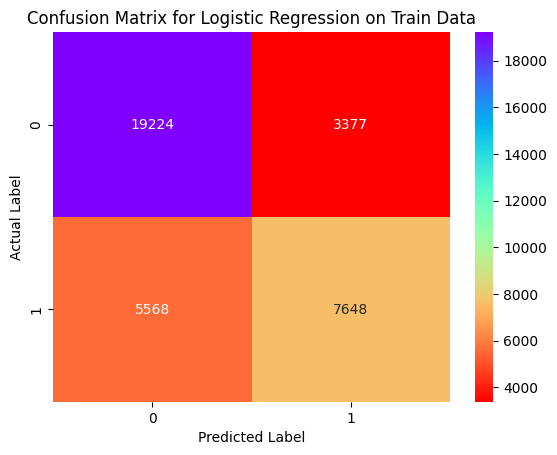

In [ ]:
# Confusion Matrix for train data
sns.heatmap(confusion_matrix(y_test,y_pred_test),annot=True,fmt='d',cbar=True,cmap='rainbow_r')
plt.title('Confusion Matrix for Logistic Regression on Train Data')
plt.xlabel('Predicted Label')
plt.ylabel('Actual Label')
plt.savefig("Confusion Matrix for Logistic Regression on Train Data")
plt.show()

In [ ]:
# ROC Curve and AUC for train set data
fpr, tpr, _ = roc_curve(y_train, y_pred_proba)
roc_auc = auc(fpr, tpr)

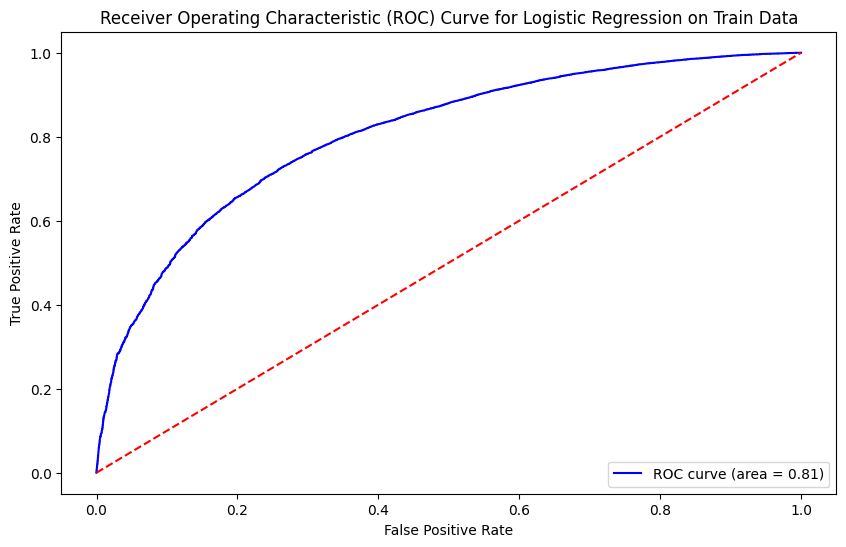

AUC: 0.8060206038089164


In [ ]:
# Plotting the ROC Curve
plt.figure(figsize=(10, 6))
plt.plot(fpr, tpr, color='blue', label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='red', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve for Logistic Regression on Train Data')
plt.legend(loc="lower right")
plt.savefig('ROC Curve for Logistic Regression on Train Data')
plt.show()
print(f"AUC: {roc_auc}")

In [ ]:
# Classification Report
class_report_test = classification_report(y_test, y_pred_test)
print("Classification Report:\n", class_report_test)

Classification Report:
               precision    recall  f1-score   support

           0       0.78      0.85      0.81     22601
           1       0.69      0.58      0.63     13216

    accuracy                           0.75     35817
   macro avg       0.73      0.71      0.72     35817
weighted avg       0.75      0.75      0.74     35817



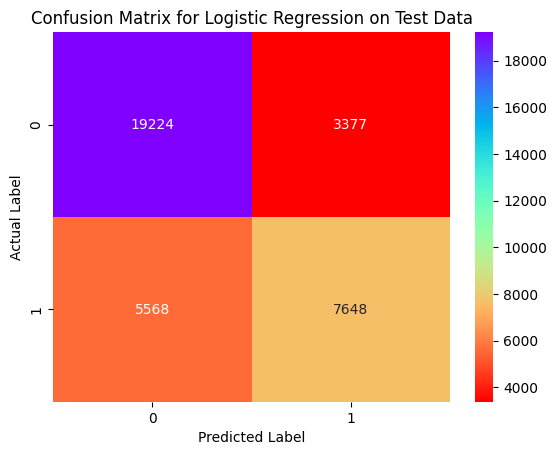

In [ ]:
# Confusion Matrix for test data
sns.heatmap(confusion_matrix(y_test, y_pred_test),annot=True,fmt='d',cbar=True,cmap='rainbow_r')
plt.title('Confusion Matrix for Logistic Regression on Test Data')
plt.xlabel('Predicted Label')
plt.ylabel('Actual Label')
plt.savefig("Confusion Matrix for Logistic Regression on Test Data")
plt.show()

In [ ]:
# ROC Curve and AUC for testmset data
fpr, tpr, _ = roc_curve(y_test, y_pred_proba_test)
roc_auc_test = auc(fpr, tpr)

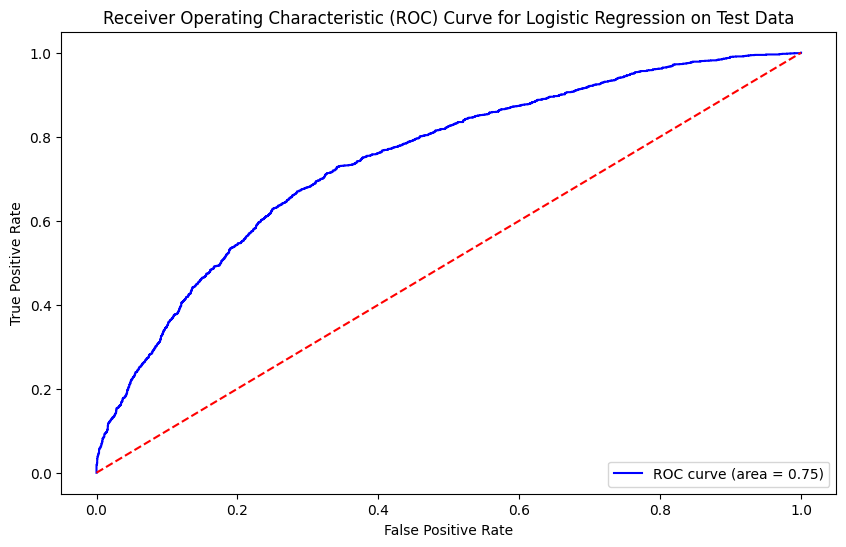

AUC: 0.7463684700655941


In [ ]:
# Plotting the ROC Curve
plt.figure(figsize=(10, 6))
plt.plot(fpr, tpr, color='blue', label='ROC curve (area = %0.2f)' % roc_auc_test)
plt.plot([0, 1], [0, 1], color='red', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve for Logistic Regression on Test Data')
plt.legend(loc="lower right")
plt.savefig('ROC Curve For Logistic Regression on Test Data')
plt.show()
print(f"AUC: {roc_auc_test}")

# Logistic Regression with Parameters

In [ ]:
# Performing Logistic Regression with parameters
logr_param = linear_model.LogisticRegression(random_state=50,penalty='l1', class_weight= 'balanced', solver= 'liblinear', max_iter = 200 ).fit(X_train,y_train)

In [ ]:
y_pred_train_P = logr_param.predict(X_train)
y_pred_test_P = logr_param.predict(X_test)

In [ ]:
y_pred_proba_P = logr_param.predict_proba(X_train)[:, 1]
y_pred_proba_test_P = logr_param.predict_proba(X_test)[:, 1]

In [ ]:
# Classification Report
class_report_param = classification_report(y_train, y_pred_train_P)
print("Classification Report:\n", class_report_param)

Classification Report:
               precision    recall  f1-score   support

           0       0.82      0.72      0.77     52565
           1       0.61      0.74      0.67     31008

    accuracy                           0.73     83573
   macro avg       0.72      0.73      0.72     83573
weighted avg       0.75      0.73      0.73     83573



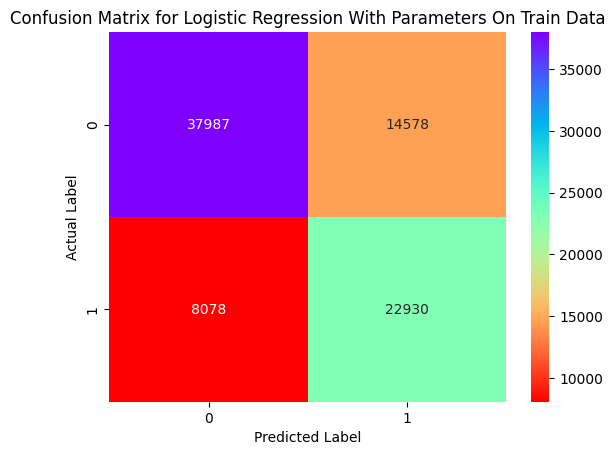

In [ ]:
# Confusion Matrix for train data
sns.heatmap(confusion_matrix(y_train, y_pred_train_P),annot=True,fmt='d',cbar=True,cmap='rainbow_r')
plt.title('Confusion Matrix for Logistic Regression With Parameters On Train Data')
plt.xlabel('Predicted Label')
plt.ylabel('Actual Label')
plt.savefig("Confusion Matrix for Logistic Regression With Parameters On Train Data")
plt.show()

In [ ]:
# ROC Curve and AUC for train set data
fpr, tpr, _ = roc_curve(y_train, y_pred_proba_P)
roc_auc_P = auc(fpr, tpr)

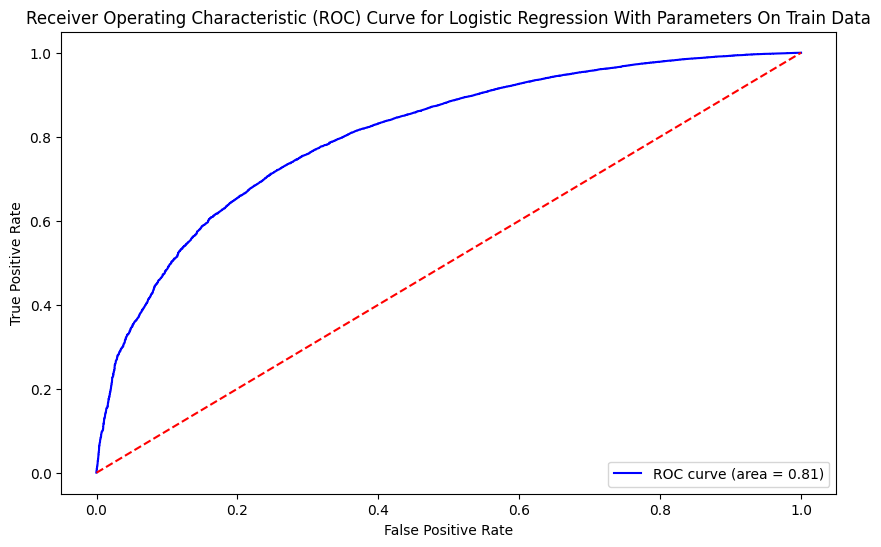

AUC: 0.8063520543438429


In [ ]:
# Plotting the ROC Curve
plt.figure(figsize=(10, 6))
plt.plot(fpr, tpr, color='blue', label='ROC curve (area = %0.2f)' % roc_auc_P)
plt.plot([0, 1], [0, 1], color='red', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve for Logistic Regression With Parameters On Train Data')
plt.legend(loc="lower right")
plt.savefig('ROC Curve for Logistic Regression With Parameters On Train Data')
plt.show()
print(f"AUC: {roc_auc_P}")

In [ ]:
# Classification Report
class_report_test_param = classification_report(y_test, y_pred_test_P)
print("Classification Report:\n", class_report_test_param)

Classification Report:
               precision    recall  f1-score   support

           0       0.82      0.72      0.77     22601
           1       0.61      0.73      0.66     13216

    accuracy                           0.73     35817
   macro avg       0.71      0.73      0.72     35817
weighted avg       0.74      0.73      0.73     35817



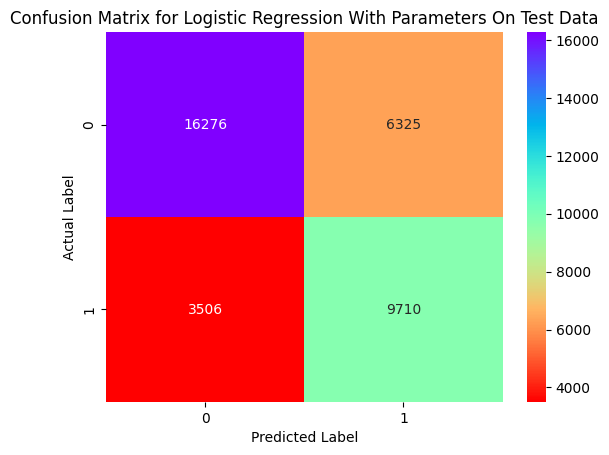

In [ ]:
# Confusion Matrix for test data
sns.heatmap(confusion_matrix(y_test, y_pred_test_P),annot=True,fmt='d',cbar=True,cmap='rainbow_r')
plt.title('Confusion Matrix for Logistic Regression With Parameters On Test Data')
plt.xlabel('Predicted Label')
plt.ylabel('Actual Label')
plt.savefig("Confusion Matrix for Logistic Regression With Parameters On Test Data")
plt.show()

In [ ]:
# ROC Curve and AUC for testmset data
fpr, tpr, _ = roc_curve(y_test, y_pred_proba_test_P)
roc_auc_test_P = auc(fpr, tpr)

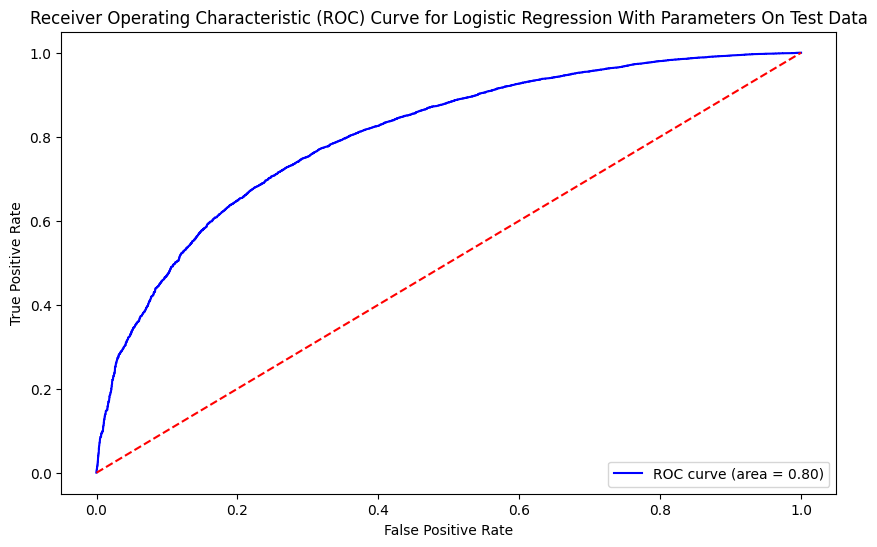

AUC: 0.8033435052987327


In [ ]:
# Plotting the ROC Curve
plt.figure(figsize=(10, 6))
plt.plot(fpr, tpr, color='blue', label='ROC curve (area = %0.2f)' % roc_auc_test_P)
plt.plot([0, 1], [0, 1], color='red', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve for Logistic Regression With Parameters On Test Data')
plt.legend(loc="lower right")
plt.savefig('ROC Curve for Logistic Regression With Parameters On Test Data')
plt.show()
print(f"AUC: {roc_auc_test_P}")

Visualize Prediction Probabilities

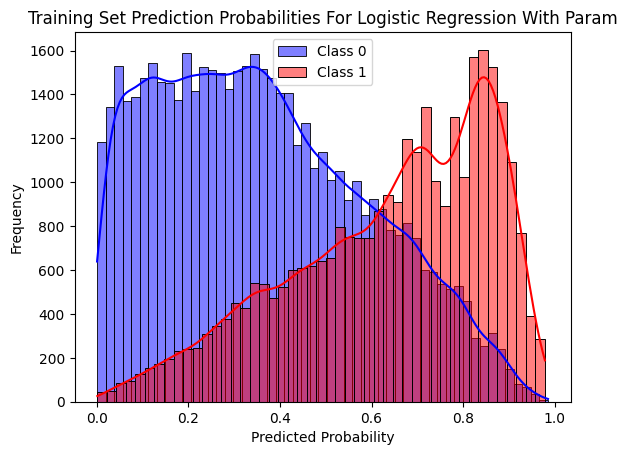

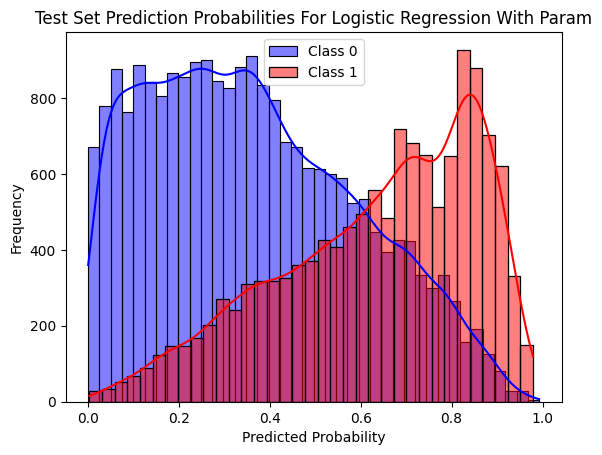

In [ ]:
def plot_prediction_probabilities(y_train, y_pred_proba_P, title='Prediction Probabilities'):
    sns.histplot(y_pred_proba_P[y_train == 0], color='blue', kde=True, label='Class 0')
    sns.histplot(y_pred_proba_P[y_train == 1], color='red', kde=True, label='Class 1')
    plt.title(title)
    plt.xlabel('Predicted Probability')
    plt.ylabel('Frequency')
    plt.legend()
    plt.savefig(f'{title}')
    plt.show()
# Assuming you have y_train_proba, y_test_proba
plot_prediction_probabilities(y_train, y_pred_proba_P, title='Training Set Prediction Probabilities For Logistic Regression With Param')
plot_prediction_probabilities(y_test, y_pred_proba_test_P, title='Test Set Prediction Probabilities For Logistic Regression With Param')

Learning Curves

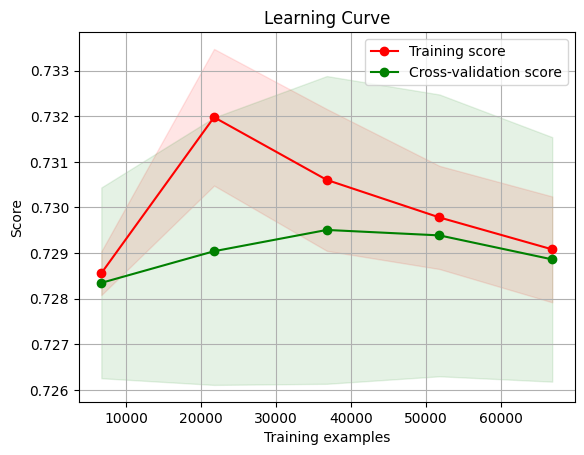

In [ ]:
def plot_learning_curve(estimator, X, y, title='Learning Curve', cv=None, n_jobs=None, train_sizes=np.linspace(.1, 1.0, 5)):
    plt.figure()
    plt.title(title)
    plt.xlabel('Training examples')
    plt.ylabel('Score')
    train_sizes, train_scores, test_scores = learning_curve(estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    plt.grid()
    plt.fill_between(train_sizes, train_scores_mean - train_scores_std, train_scores_mean + train_scores_std, alpha=0.1, color='r')
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,test_scores_mean + test_scores_std, alpha=0.1, color='g')
    plt.plot(train_sizes, train_scores_mean, 'o-', color='r', label='Training score')
    plt.plot(train_sizes, test_scores_mean, 'o-', color='g', label='Cross-validation score')
    plt.legend(loc='best')
    plt.savefig(f'Learning Curve For {estimator}')
    plt.show()

# Assuming you have a model, X_train, y_train
plot_learning_curve(logr_param, X_train, y_train)

Precision Recall Curve

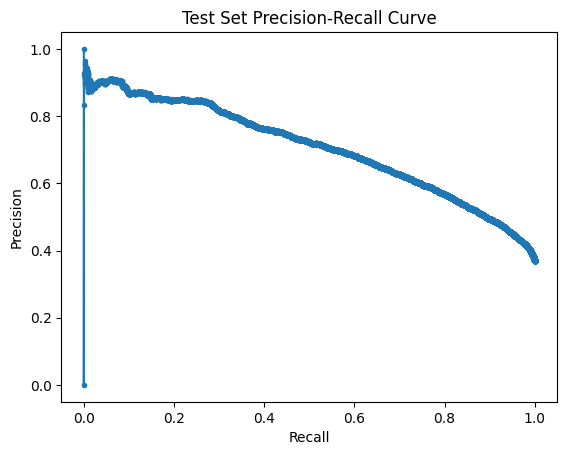

In [ ]:
def plot_precision_recall_curve(y_train, y_pred_proba_P, title='Precision-Recall Curve'):
    precision, recall, thresholds = precision_recall_curve(y_train, y_pred_proba_P)
    plt.plot(recall, precision, marker='.')
    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.title(title)
    plt.savefig(f'{title} For Logistic Regression With Parameters')
    plt.show()

plot_precision_recall_curve(y_test, y_pred_proba_test_P, title='Test Set Precision-Recall Curve')

In [ ]:
intercept_variable = logr_param.intercept_
print(intercept_variable)

[-0.24504365]


In [ ]:
intercept_variable1 = logr.intercept_
print(intercept_variable1)

[-0.76875265]


In [ ]:
f1= logr.n_iter_
print(f1)

[21]


In [ ]:
f2= logr_param.n_iter_
print(f2)

[23]


# Logistic Regression CV

In [ ]:
logr_CV = LogisticRegressionCV(cv=20, random_state=50, penalty= 'l1', solver= 'liblinear', n_jobs= -1, max_iter = 200 ).fit(X_train, y_train)

In [ ]:
y_pred_lrcv = logr_CV.predict(X_train)
y_pred_lrcv_test = logr_CV.predict(X_test)

In [ ]:
y_pred_proba_lrcv = logr_CV.predict_proba(X_train)[:, 1]
y_pred_proba_test_lrcv = logr_CV.predict_proba(X_test)[:, 1]

In [ ]:
# Classification Report
class_report_lrcv_train = classification_report(y_train, y_pred_lrcv)
print("Classification Report:\n", class_report_lrcv_train)

Classification Report:
               precision    recall  f1-score   support

           0       0.78      0.85      0.81     52565
           1       0.70      0.59      0.64     31008

    accuracy                           0.76     83573
   macro avg       0.74      0.72      0.73     83573
weighted avg       0.75      0.76      0.75     83573



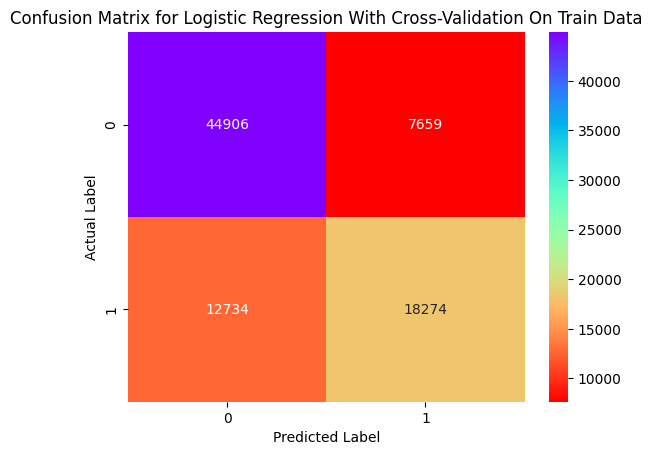

In [ ]:
# Confusion Matrix for train data
sns.heatmap(confusion_matrix(y_train, y_pred_lrcv),annot=True,fmt='d',cbar=True,cmap='rainbow_r')
plt.title('Confusion Matrix for Logistic Regression With Cross-Validation On Train Data')
plt.xlabel('Predicted Label')
plt.ylabel('Actual Label')
plt.savefig("Confusion Matrix for Logistic Regression With Cross-Validation On Train Data")
plt.show()

In [ ]:
# ROC Curve and AUC for train set data
fpr, tpr, _ = roc_curve(y_train, y_pred_proba_lrcv)
roc_auc_lrcv = auc(fpr, tpr)

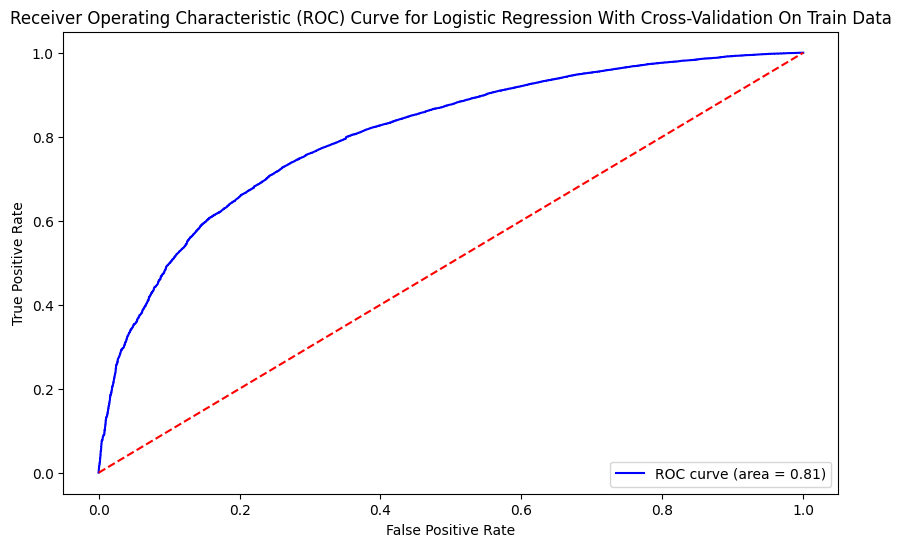

AUC: 0.8055659207917624


In [ ]:
# Plotting the ROC Curve
plt.figure(figsize=(10, 6))
plt.plot(fpr, tpr, color='blue', label='ROC curve (area = %0.2f)' % roc_auc_lrcv)
plt.plot([0, 1], [0, 1], color='red', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve for Logistic Regression With Cross-Validation On Train Data')
plt.legend(loc="lower right")
plt.savefig('ROC Curve For Logistic Regression With Cross-Validation On Train Data')
plt.show()
print(f"AUC: {roc_auc_lrcv}")

In [ ]:
# Classification Report
class_report_lrcv_test = classification_report(y_test, y_pred_lrcv_test)
print("Classification Report:\n", class_report_lrcv_test)

Classification Report:
               precision    recall  f1-score   support

           0       0.78      0.86      0.81     22601
           1       0.70      0.58      0.64     13216

    accuracy                           0.75     35817
   macro avg       0.74      0.72      0.72     35817
weighted avg       0.75      0.75      0.75     35817



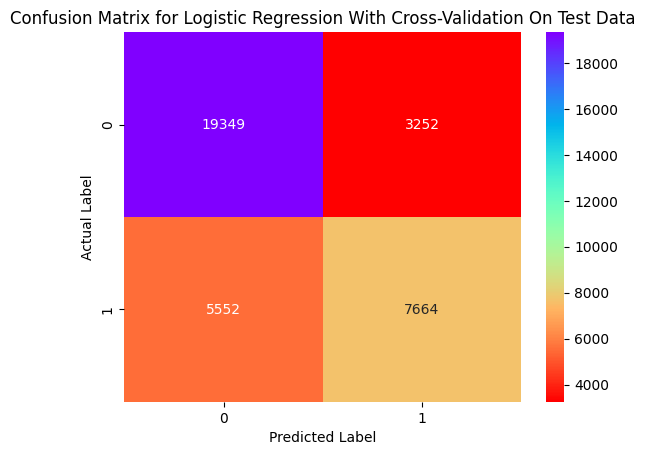

In [ ]:
# Confusion Matrix for test data
sns.heatmap(confusion_matrix(y_test, y_pred_lrcv_test),annot=True,fmt='d',cbar=True,cmap='rainbow_r')
plt.title('Confusion Matrix for Logistic Regression With Cross-Validation On Test Data')
plt.xlabel('Predicted Label')
plt.ylabel('Actual Label')
plt.savefig("Confusion Matrix for Logistic Regression With Cross-Validation On Test Data")
plt.show()

In [ ]:
# ROC Curve and AUC for testmset data
fpr, tpr, _ = roc_curve(y_test, y_pred_proba_test_lrcv)
roc_auc_test_lrcv = auc(fpr, tpr)

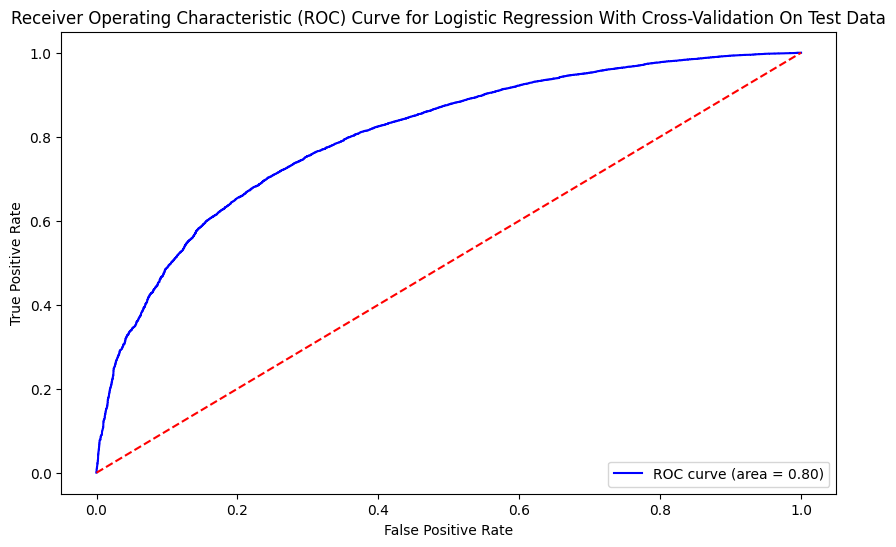

AUC: 0.8030214458090896


In [ ]:
# Plotting the ROC Curve
plt.figure(figsize=(10, 6))
plt.plot(fpr, tpr, color='blue', label='ROC curve (area = %0.2f)' % roc_auc_test_lrcv)
plt.plot([0, 1], [0, 1], color='red', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve for Logistic Regression With Cross-Validation On Test Data')
plt.legend(loc="lower right")
plt.savefig('ROC Curve For Logistic Regression With Cross-Validation On Test Data')
plt.show()
print(f"AUC: {roc_auc_test_lrcv}")

# KNN MODEL

In [ ]:
knn = KNeighborsClassifier().fit(X_train, y_train)

In [ ]:
y_pred_knn = knn.predict(X_train)
y_pred_knn_test = knn.predict(X_test)

In [ ]:
y_pred_proba_knn = knn.predict_proba(X_train)[:, 1]
y_pred_proba_test_knn = knn.predict_proba(X_test)[:, 1]

In [ ]:
# Classification Report for train data
class_report_knn = classification_report(y_train, y_pred_knn)
print("Classification Report:\n", class_report_knn)

Classification Report:
               precision    recall  f1-score   support

           0       0.88      0.92      0.90     52565
           1       0.85      0.79      0.82     31008

    accuracy                           0.87     83573
   macro avg       0.86      0.85      0.86     83573
weighted avg       0.87      0.87      0.87     83573



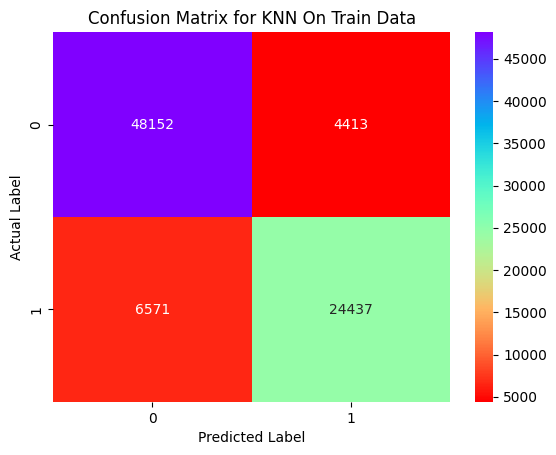

In [ ]:
# Confusion Matrix for train data
sns.heatmap(confusion_matrix(y_train, y_pred_knn),annot=True,fmt='d',cbar=True,cmap='rainbow_r')
plt.title('Confusion Matrix for KNN On Train Data')
plt.xlabel('Predicted Label')
plt.ylabel('Actual Label')
plt.savefig("Confusion Matrix for KNN On Train Data")
plt.show()

In [ ]:
# ROC Curve and AUC for train set data
fpr, tpr, _ = roc_curve(y_train, y_pred_proba_knn)
roc_auc_knn = auc(fpr, tpr)

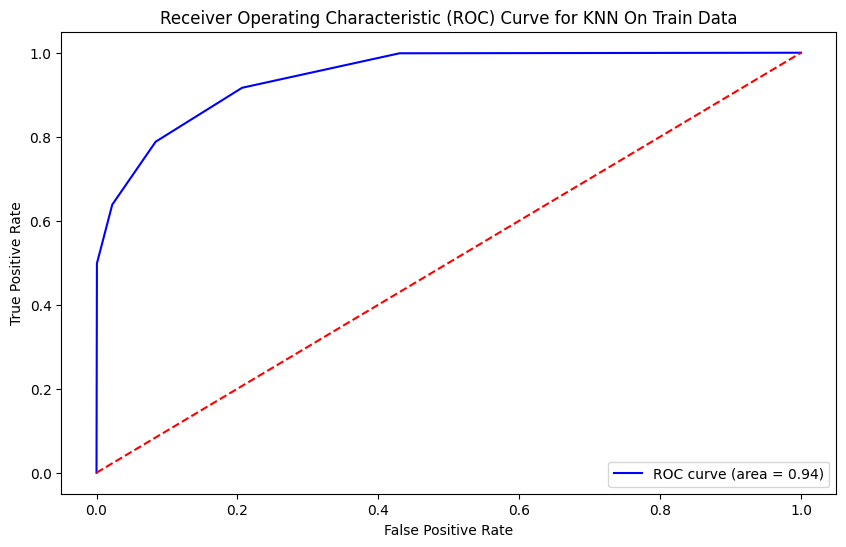

AUC: 0.9445283884604221


In [ ]:
# Plotting the ROC Curve
plt.figure(figsize=(10, 6))
plt.plot(fpr, tpr, color='blue', label='ROC curve (area = %0.2f)' % roc_auc_knn)
plt.plot([0, 1], [0, 1], color='red', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve for KNN On Train Data')
plt.legend(loc="lower right")
plt.savefig('ROC Curve for KNN On Train Data')
plt.show()
print(f"AUC: {roc_auc_knn}")

In [ ]:
# Classification Report test data
class_report_knn_test = classification_report(y_test, y_pred_knn_test)
print("Classification Report:\n", class_report_knn_test)

Classification Report:
               precision    recall  f1-score   support

           0       0.84      0.87      0.85     22601
           1       0.76      0.71      0.74     13216

    accuracy                           0.81     35817
   macro avg       0.80      0.79      0.79     35817
weighted avg       0.81      0.81      0.81     35817



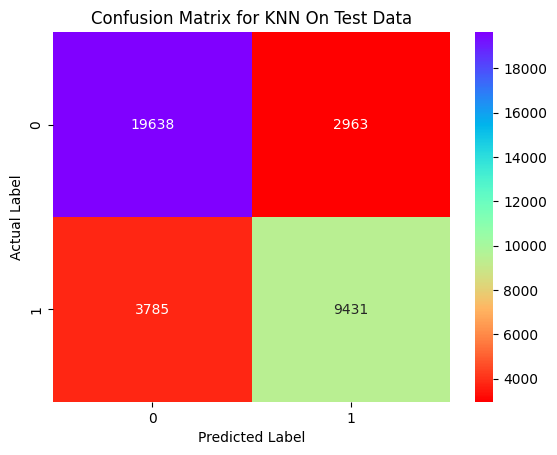

In [ ]:
# Confusion Matrix for test data
sns.heatmap(confusion_matrix(y_test, y_pred_knn_test),annot=True,fmt='d',cbar=True,cmap='rainbow_r')
plt.title('Confusion Matrix for KNN On Test Data')
plt.xlabel('Predicted Label')
plt.ylabel('Actual Label')
plt.savefig("Confusion Matrix for KNN On Test Data")
plt.show()

In [ ]:
# ROC Curve and AUC for testmset data
fpr, tpr, _ = roc_curve(y_test, y_pred_proba_test_knn)
roc_auc_test_knn = auc(fpr, tpr)

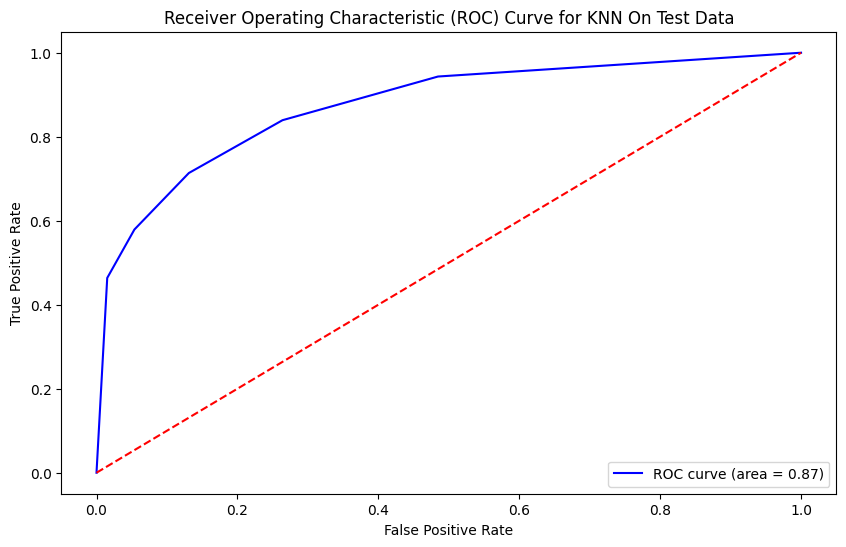

AUC: 0.8742160794648676


In [ ]:
# Plotting the ROC Curve
plt.figure(figsize=(10, 6))
plt.plot(fpr, tpr, color='blue', label='ROC curve (area = %0.2f)' % roc_auc_test_knn)
plt.plot([0, 1], [0, 1], color='red', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve for KNN On Test Data')
plt.legend(loc="lower right")
plt.savefig('ROC Curve for KNN On Test Data')
plt.show()
print(f"AUC: {roc_auc_test_knn}")

# KNN with Parameters

In [ ]:
knn_param = KNeighborsClassifier(n_neighbors = 10, n_jobs= -1 , weights= 'distance').fit(X_train, y_train)

In [ ]:
y_pred_knn_p = knn_param.predict(X_train)
y_pred_knn_ptest = knn_param.predict(X_test)

In [ ]:
y_pred_proba_knnp = knn_param.predict_proba(X_train)[:, 1]
y_pred_proba_test_knnp = knn_param.predict_proba(X_test)[:, 1]

In [ ]:
# Classification Report for train data
class_report_knn_p = classification_report(y_train, y_pred_knn_p)
print("Classification Report:\n", class_report_knn_p)

Classification Report:
               precision    recall  f1-score   support

           0       0.99      1.00      0.99     52565
           1       0.99      0.98      0.99     31008

    accuracy                           0.99     83573
   macro avg       0.99      0.99      0.99     83573
weighted avg       0.99      0.99      0.99     83573



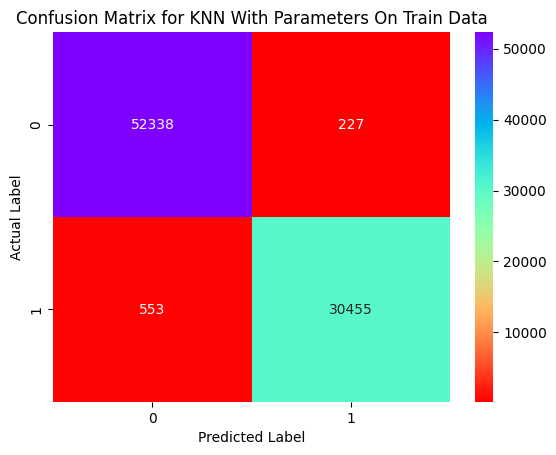

In [ ]:
# Confusion Matrix for train data
sns.heatmap(confusion_matrix(y_train, y_pred_knn_p),annot=True,fmt='d',cbar=True,cmap='rainbow_r')
plt.title('Confusion Matrix for KNN With Parameters On Train Data')
plt.xlabel('Predicted Label')
plt.ylabel('Actual Label')
plt.savefig("Confusion Matrix for KNN With Parameters On Train Data")
plt.show()

In [ ]:
# ROC Curve and AUC for train set data
fpr, tpr, _ = roc_curve(y_train, y_pred_proba_knnp)
roc_auc_knnp = auc(fpr, tpr)

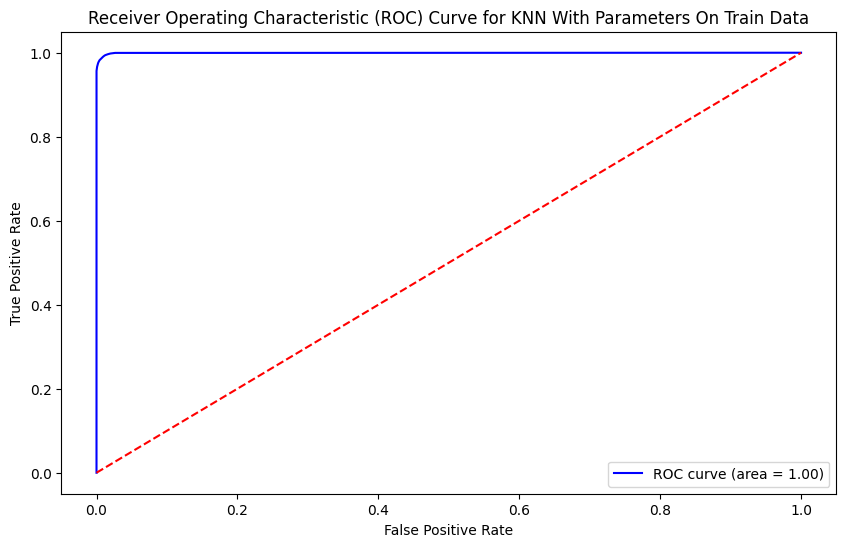

AUC: 0.9995053844215873


In [ ]:
# Plotting the ROC Curve
plt.figure(figsize=(10, 6))
plt.plot(fpr, tpr, color='blue', label='ROC curve (area = %0.2f)' % roc_auc_knnp)
plt.plot([0, 1], [0, 1], color='red', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve for KNN With Parameters On Train Data')
plt.legend(loc="lower right")
plt.savefig('ROC Curve for KNN With Parameters On Train Data')
plt.show()
print(f"AUC: {roc_auc_knnp}")

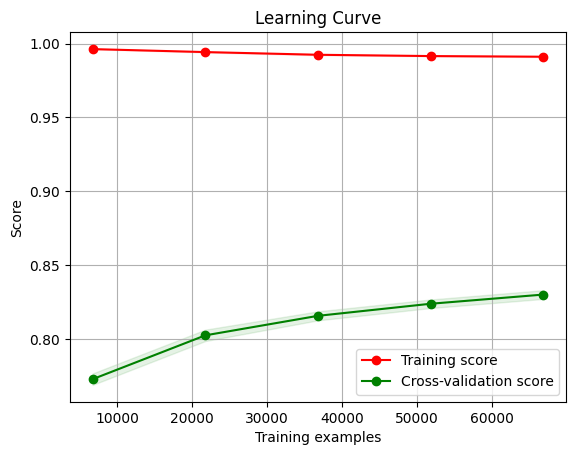

In [ ]:
# Assuming you have a model, X_train, y_train
plot_learning_curve(knn_param, X_train, y_train)

In [ ]:
# Classification Report test data
class_report_knn_ptest = classification_report(y_test, y_pred_knn_ptest)
print("Classification Report:\n", class_report_knn_ptest)

Classification Report:
               precision    recall  f1-score   support

           0       0.86      0.89      0.88     22601
           1       0.80      0.75      0.77     13216

    accuracy                           0.84     35817
   macro avg       0.83      0.82      0.82     35817
weighted avg       0.84      0.84      0.84     35817



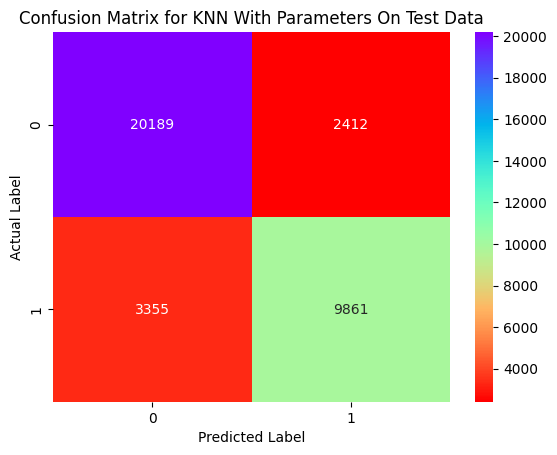

In [ ]:
# Confusion Matrix for test data
sns.heatmap(confusion_matrix(y_test, y_pred_knn_ptest),annot=True,fmt='d',cbar=True,cmap='rainbow_r')
plt.title('Confusion Matrix for KNN With Parameters On Test Data')
plt.xlabel('Predicted Label')
plt.ylabel('Actual Label')
plt.savefig("Confusion Matrix for KNN With Parameters On Test Data")
plt.show()

In [ ]:
# ROC Curve and AUC for test set data
fpr, tpr, _ = roc_curve(y_test, y_pred_proba_test_knnp)
roc_auc_test_knnp = auc(fpr, tpr)

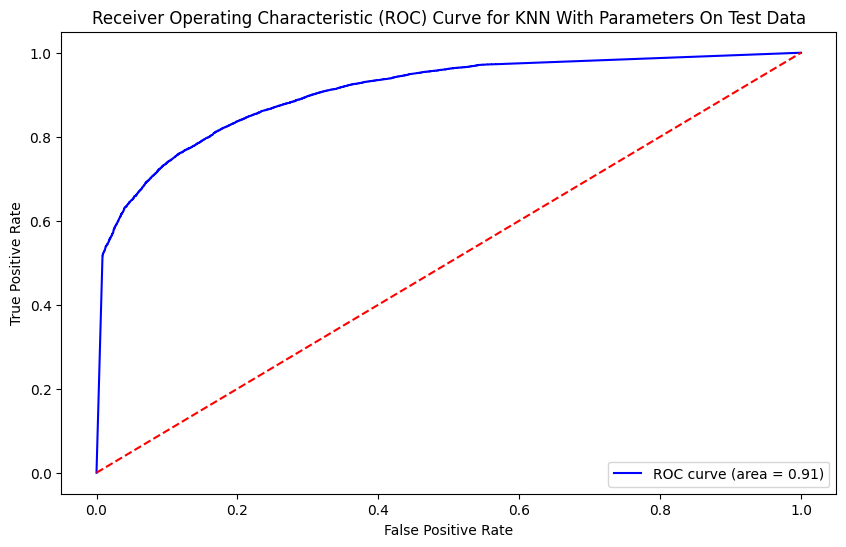

AUC: 0.9060908124364635


In [ ]:
# Plotting the ROC Curve
plt.figure(figsize=(10, 6))
plt.plot(fpr, tpr, color='blue', label='ROC curve (area = %0.2f)' % roc_auc_test_knnp)
plt.plot([0, 1], [0, 1], color='red', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve for KNN With Parameters On Test Data')
plt.legend(loc="lower right")
plt.savefig('ROC Curev for KNN With Parameters On Test Data')
plt.show()
print(f"AUC: {roc_auc_test_knnp}")

KNN hyper tuning

In [ ]:
# Define the parameter grid for GridSearchCV
knn_param_grid_knn = {
    'n_neighbors': [3, 5, 7, 9, 11],
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean', 'manhattan']
}

In [ ]:
# Initialize GridSearchCV
knn_grid_search = GridSearchCV(estimator = knn, param_grid = knn_param_grid_knn, cv = 5, n_jobs = -1, verbose = 2).fit(X_train, y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


In [ ]:
# Print the best parameters and the best score
print(f"Best parameters for KNN: {knn_grid_search.best_params_}")
print(f"Best cross-validation score for KNN: {knn_grid_search.best_score_}")

Best parameters for KNN: {'metric': 'manhattan', 'n_neighbors': 11, 'weights': 'distance'}
Best cross-validation score for KNN: 0.8371722366510819


In [ ]:
# Evaluate the best model on the test data
best_knn = knn_grid_search.best_estimator_
test_score_knn = best_knn.score(X_test, y_test)
print(f"Test score: {test_score_knn}")

KeyboardInterrupt: 

In [ ]:
knn_grid = KNeighborsClassifier(n_neighbors = 11, n_jobs= -1 , weights= 'distance', metric= 'manhattan').fit(X_train, y_train)

In [ ]:
y_pred_knn_G = knn_grid.predict(X_train)
y_pred_knn_Gtest = knn_grid.predict(X_test)

In [ ]:
y_pred_proba_knng = knn_grid.predict_proba(X_train)[:, 1]
y_pred_proba_test_knng = knn_grid.predict_proba(X_test)[:, 1]

In [89]:
# Classification Report for train data
class_report_knn_g = classification_report(y_train, y_pred_knn_G)
print("Classification Report:\n", class_report_knn_g)

Classification Report:
               precision    recall  f1-score   support

           0       0.99      1.00      0.99     52565
           1       0.99      0.98      0.99     31008

    accuracy                           0.99     83573
   macro avg       0.99      0.99      0.99     83573
weighted avg       0.99      0.99      0.99     83573



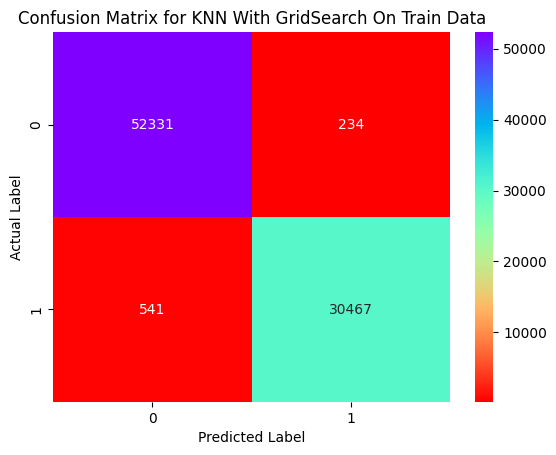

In [90]:
# Confusion Matrix for train data
sns.heatmap(confusion_matrix(y_train, y_pred_knn_G),annot=True,fmt='d',cbar=True,cmap='rainbow_r')
plt.title('Confusion Matrix for KNN With GridSearch On Train Data')
plt.xlabel('Predicted Label')
plt.ylabel('Actual Label')
plt.savefig("Confusion Matrix for KNN With GridSearch On Train Data")
plt.show()

In [91]:
# ROC Curve and AUC for train set data
fpr, tpr, _ = roc_curve(y_train, y_pred_proba_knng)
roc_auc_knng = auc(fpr, tpr)

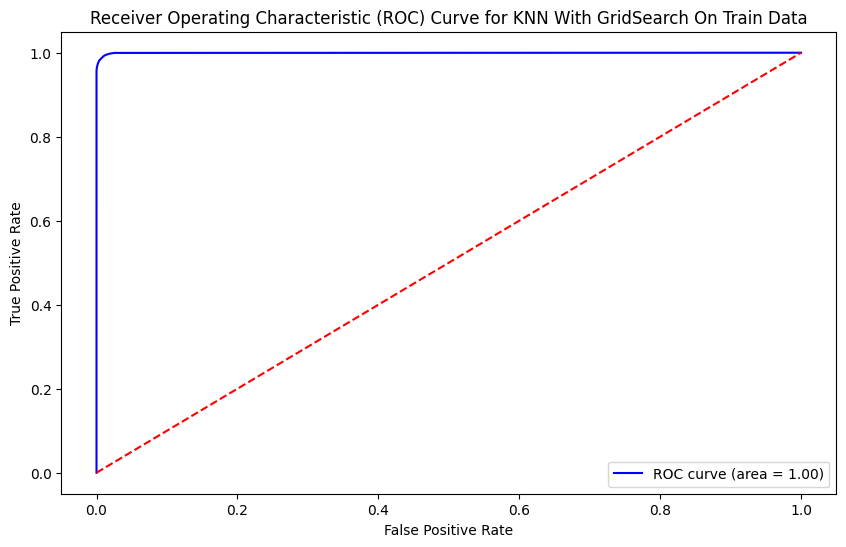

AUC: 0.999548330598992


In [92]:
# Plotting the ROC Curve
plt.figure(figsize=(10, 6))
plt.plot(fpr, tpr, color='blue', label='ROC curve (area = %0.2f)' % roc_auc_knng)
plt.plot([0, 1], [0, 1], color='red', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve for KNN With GridSearch On Train Data')
plt.legend(loc="lower right")
plt.savefig('ROC Curve for KNN With GridSearch On Train Data')
plt.show()
print(f"AUC: {roc_auc_knng}")

In [93]:
# Classification Report test data
class_report_knn_gtest = classification_report(y_test, y_pred_knn_Gtest)
print("Classification Report:\n", class_report_knn_gtest)

Classification Report:
               precision    recall  f1-score   support

           0       0.86      0.90      0.88     22601
           1       0.81      0.75      0.78     13216

    accuracy                           0.84     35817
   macro avg       0.83      0.82      0.83     35817
weighted avg       0.84      0.84      0.84     35817



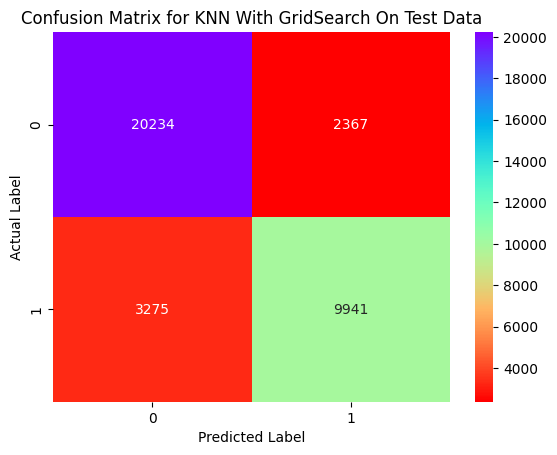

In [94]:
# Confusion Matrix for test data
sns.heatmap(confusion_matrix(y_test, y_pred_knn_Gtest),annot=True,fmt='d',cbar=True,cmap='rainbow_r')
plt.title('Confusion Matrix for KNN With GridSearch On Test Data')
plt.xlabel('Predicted Label')
plt.ylabel('Actual Label')
plt.savefig("Confusion Matrix for KNN With GridSearch On Test Data")
plt.show()

In [95]:
# ROC Curve and AUC for testmset data
fpr, tpr, _ = roc_curve(y_test, y_pred_proba_test_knng)
roc_auc_test_knng = auc(fpr, tpr)

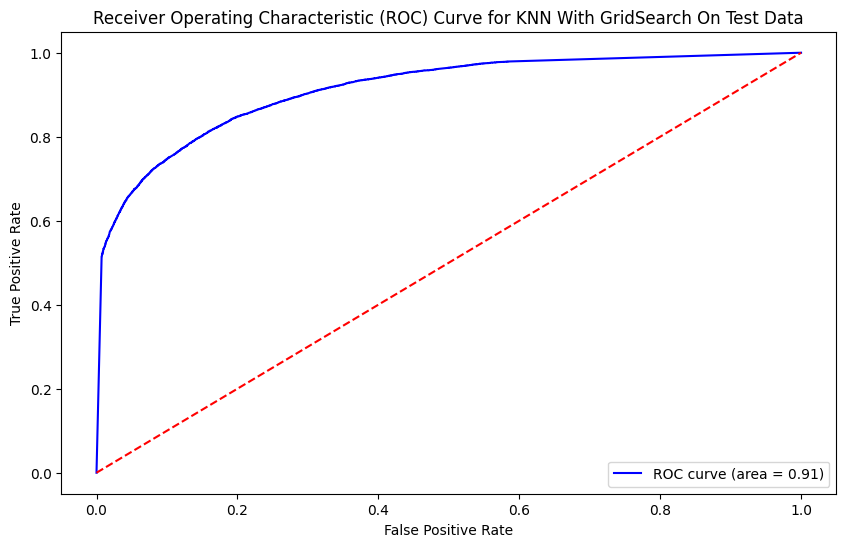

AUC: 0.9119978500062083


In [96]:
# Plotting the ROC Curve
plt.figure(figsize=(10, 6))
plt.plot(fpr, tpr, color='blue', label='ROC curve (area = %0.2f)' % roc_auc_test_knng)
plt.plot([0, 1], [0, 1], color='red', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve for KNN With GridSearch On Test Data')
plt.legend(loc="lower right")
plt.savefig('ROC Curve for KNN With GridSearch On Test Data')
plt.show()
print(f"AUC: {roc_auc_test_knng}")

In [97]:
# creating odd list of K for KNN
neighbors = list(range(1, 50, 2))

In [98]:
# empty list that will hold cv scores
cv_scores = []
# perform 10-fold cross validation
for k in neighbors:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, X_train, y_train, cv=10, scoring='accuracy',n_jobs=-1)
    cv_scores.append(scores.mean())

In [99]:
print(cv_scores)

[0.8066359378560867, 0.8069949355316901, 0.8086581388111174, 0.809627439120994, 0.8079762075848166, 0.8074138305790163, 0.8057984455517472, 0.8045061343802267, 0.8033335134392052, 0.8018737224187114, 0.8002105033907579, 0.7993130908077485, 0.7989421142304741, 0.7980327299042148, 0.7968241937334438, 0.7959865854626844, 0.7943831950856123, 0.7937849143035359, 0.7924447591095417, 0.7922413382605031, 0.7916789569596502, 0.7918584271637681, 0.7910926450574555, 0.7910806675874686, 0.7898362405255793]


In [101]:
print(scores.mean())

0.7898362405255793


In [102]:
print(1 - 0.6)

0.4


In [103]:
# changing to misclassification error
mse = [1 - x for x in cv_scores]
print(mse.index(min(mse)))

3


The optimal number of neighbors is 7


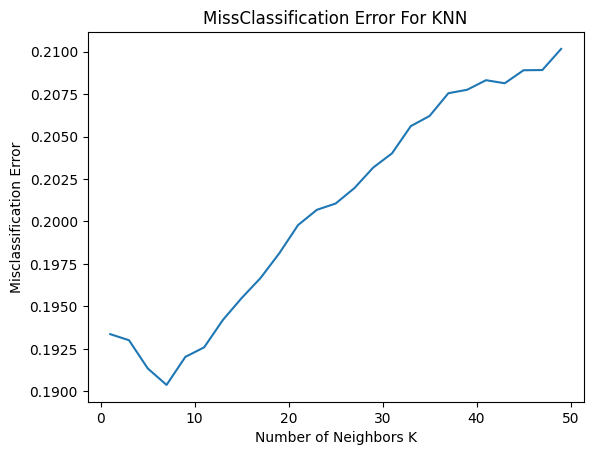

In [104]:
# determining best k
optimal_k = neighbors[mse.index(min(mse))]
print("The optimal number of neighbors is {}".format(optimal_k))

# plot misclassification error vs k
plt.plot(neighbors, mse)
plt.title('MissClassification Error For KNN')
plt.xlabel("Number of Neighbors K")
plt.ylabel("Misclassification Error")
plt.savefig('MissClassification Error For KNN')
plt.show()

In [105]:
knn_mce = KNeighborsClassifier(n_neighbors= 7, n_jobs= -1, weights= 'distance').fit(X_train, y_train)

In [106]:
y_pred_knnmce = knn_mce.predict(X_train)
y_pred_knnmce_test = knn_mce.predict(X_test)

In [107]:
y_pred_proba_knnmce = knn_mce.predict_proba(X_train)[:, 1]
y_pred_proba_test_knnmce = knn_mce.predict_proba(X_test)[:, 1]

In [108]:
# Classification Report for train data
class_report_knnmce = classification_report(y_train, y_pred_knnmce)
print("Classification Report:\n", class_report_knnmce)

Classification Report:
               precision    recall  f1-score   support

           0       0.99      0.99      0.99     52565
           1       0.99      0.98      0.99     31008

    accuracy                           0.99     83573
   macro avg       0.99      0.99      0.99     83573
weighted avg       0.99      0.99      0.99     83573



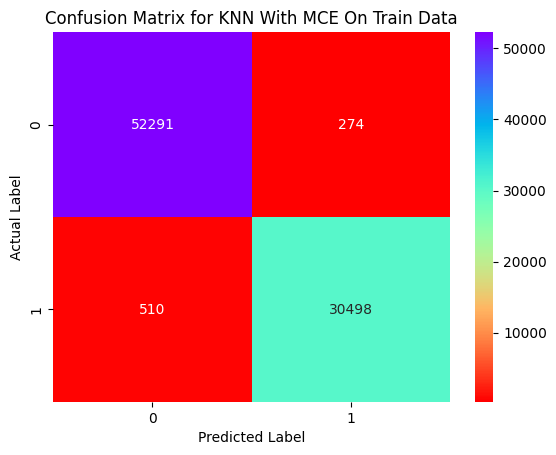

In [109]:
# Confusion Matrix for train data
conf_matrix_knn_mce= confusion_matrix(y_train, y_pred_knnmce)
sns.heatmap(confusion_matrix(y_train, y_pred_knnmce),annot=True,fmt='d',cbar=True,cmap='rainbow_r')
plt.title('Confusion Matrix for KNN With MCE On Train Data')
plt.xlabel('Predicted Label')
plt.ylabel('Actual Label')
plt.savefig("Confusion Matrix for KNN With MCE On Train Data")
plt.show()

In [110]:
# ROC Curve and AUC for train set data
fpr, tpr, _ = roc_curve(y_train, y_pred_proba_knnmce)
roc_auc_knnmce = auc(fpr, tpr)

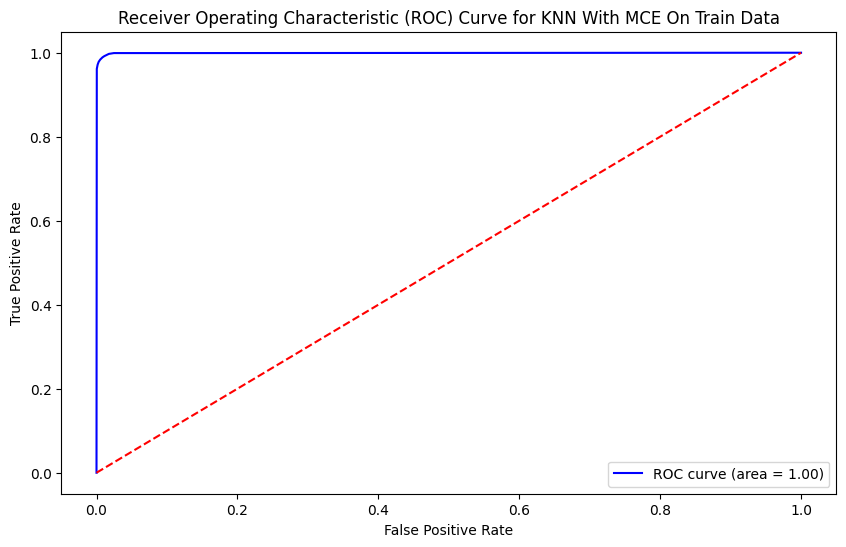

AUC: 0.9990702899093826


In [111]:
# Plotting the ROC Curve
plt.figure(figsize=(10, 6))
plt.plot(fpr, tpr, color='blue', label='ROC curve (area = %0.2f)' % roc_auc_knnmce)
plt.plot([0, 1], [0, 1], color='red', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve for KNN With MCE On Train Data')
plt.legend(loc="lower right")
plt.savefig('ROC Curve for KNN With MCE On Train Data')
plt.show()
print(f"AUC: {roc_auc_knnmce}")

In [112]:
# Classification Report test data
class_report_knn_testmce = classification_report(y_test, y_pred_knnmce_test)
print("Classification Report:\n", class_report_knn_testmce)

Classification Report:
               precision    recall  f1-score   support

           0       0.86      0.89      0.87     22601
           1       0.80      0.75      0.77     13216

    accuracy                           0.84     35817
   macro avg       0.83      0.82      0.82     35817
weighted avg       0.83      0.84      0.83     35817



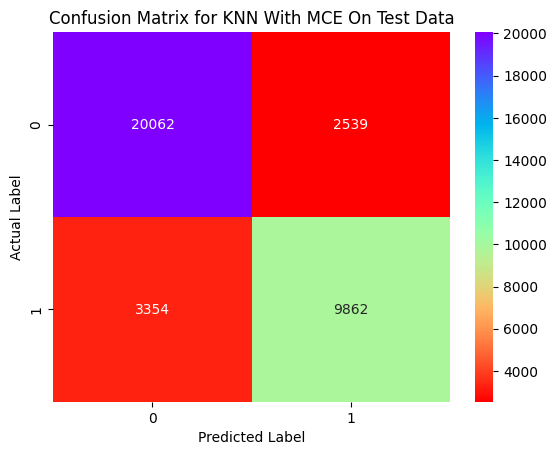

In [113]:
# Confusion Matrix for test data
sns.heatmap(confusion_matrix(y_test, y_pred_knnmce_test),annot=True,fmt='d',cbar=True,cmap='rainbow_r')
plt.title('Confusion Matrix for KNN With MCE On Test Data')
plt.xlabel('Predicted Label')
plt.ylabel('Actual Label')
plt.savefig("Confusion Matrix for KNN With MCE On Test Data")
plt.show()

In [114]:
# ROC Curve and AUC for testmset data
fpr, tpr, _ = roc_curve(y_test, y_pred_proba_test_knnmce)
roc_auc_test_knnmce = auc(fpr, tpr)

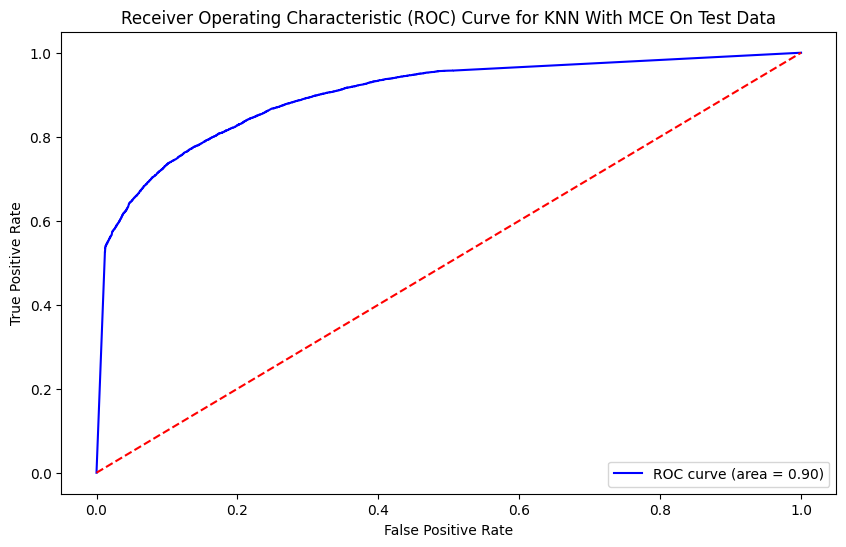

AUC: 0.9004881658207285


In [115]:
# Plotting the ROC Curve
plt.figure(figsize=(10, 6))
plt.plot(fpr, tpr, color='blue', label='ROC curve (area = %0.2f)' % roc_auc_test_knnmce)
plt.plot([0, 1], [0, 1], color='red', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve for KNN With MCE On Test Data')
plt.legend(loc="lower right")
plt.savefig('ROC Curve for KNN With MCE On Test Data')
plt.show()
print(f"AUC: {roc_auc_test_knnmce}")

# SVM Model

In [116]:
svm = SVC(random_state = 50).fit(X_train, y_train)

In [117]:
y_pred_svm = svm.predict(X_train)
y_pred_svm_test = svm.predict(X_test)

In [119]:
# Classification Report for train data
class_report_svm = classification_report(y_train, y_pred_svm)
print("Classification Report:\n", class_report_svm)

Classification Report:
               precision    recall  f1-score   support

           0       0.84      0.89      0.87     52565
           1       0.80      0.71      0.75     31008

    accuracy                           0.83     83573
   macro avg       0.82      0.80      0.81     83573
weighted avg       0.82      0.83      0.82     83573



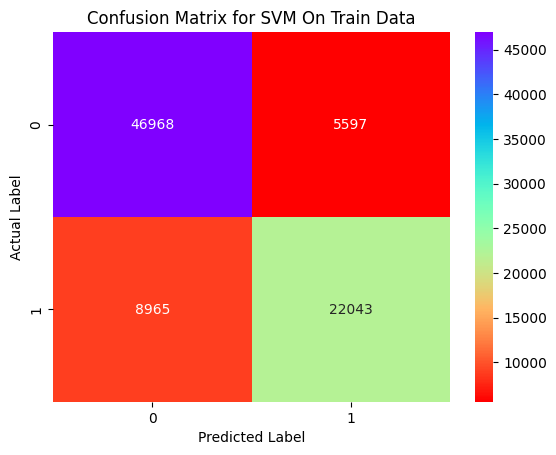

In [120]:
# Confusion Matrix for train data
sns.heatmap(confusion_matrix(y_train, y_pred_svm),annot=True,fmt='d',cbar=True,cmap='rainbow_r')
plt.title('Confusion Matrix for SVM On Train Data')
plt.xlabel('Predicted Label')
plt.ylabel('Actual Label')
plt.savefig("Confusion Matrix for SVM On Train Data")
plt.show()

In [121]:
# ROC Curve and AUC for train set data
fpr, tpr, _ = roc_curve(y_train, y_pred_svm)
roc_auc_svm = auc(fpr, tpr)

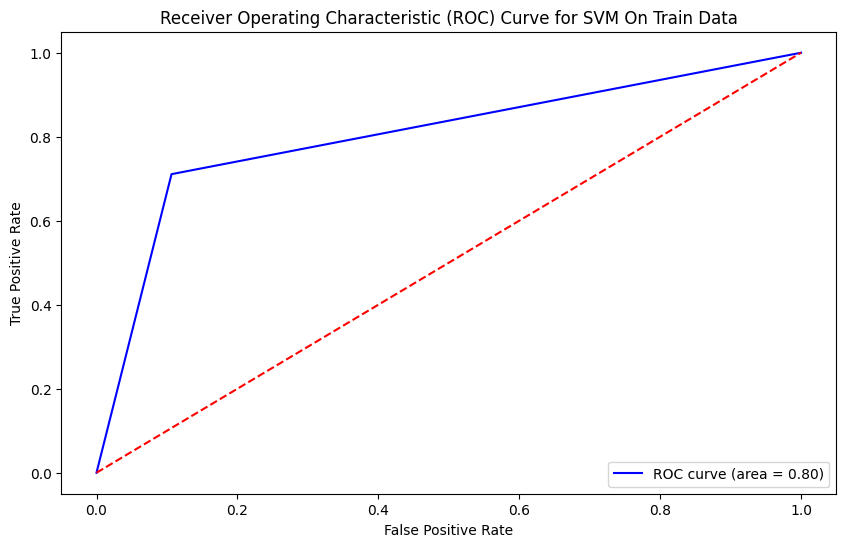

AUC: 0.802201684334114


In [122]:
# Plotting the ROC Curve
plt.figure(figsize=(10, 6))
plt.plot(fpr, tpr, color='blue', label='ROC curve (area = %0.2f)' % roc_auc_svm)
plt.plot([0, 1], [0, 1], color='red', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve for SVM On Train Data')
plt.legend(loc="lower right")
plt.savefig('ROC Curve for SVM On Train Data')
plt.show()
print(f"AUC: {roc_auc_svm}")

In [123]:
# Classification Report test data
class_report_svm_test = classification_report(y_test, y_pred_svm_test)
print("Classification Report:\n", class_report_svm_test)

Classification Report:
               precision    recall  f1-score   support

           0       0.83      0.88      0.86     22601
           1       0.78      0.70      0.73     13216

    accuracy                           0.81     35817
   macro avg       0.80      0.79      0.80     35817
weighted avg       0.81      0.81      0.81     35817



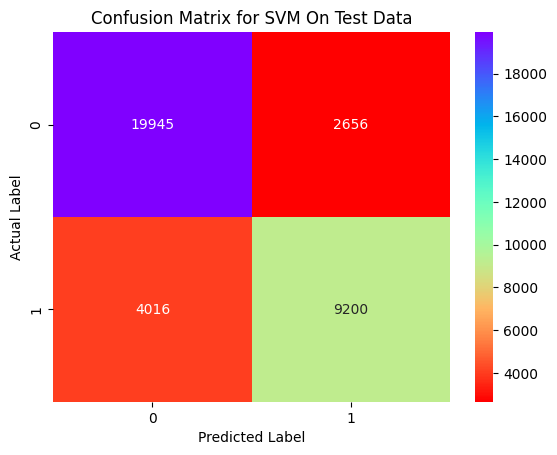

In [124]:
# Confusion Matrix for test data
sns.heatmap(confusion_matrix(y_test, y_pred_svm_test),annot=True,fmt='d',cbar=True,cmap='rainbow_r')
plt.title('Confusion Matrix for SVM On Test Data')
plt.xlabel('Predicted Label')
plt.ylabel('Actual Label')
plt.savefig("Confusion Matrix for SVM On Test Data")
plt.show()

In [125]:
# ROC Curve and AUC for testmset data
fpr, tpr, _ = roc_curve(y_test, y_pred_svm_test)
roc_auc_test_svm = auc(fpr, tpr)

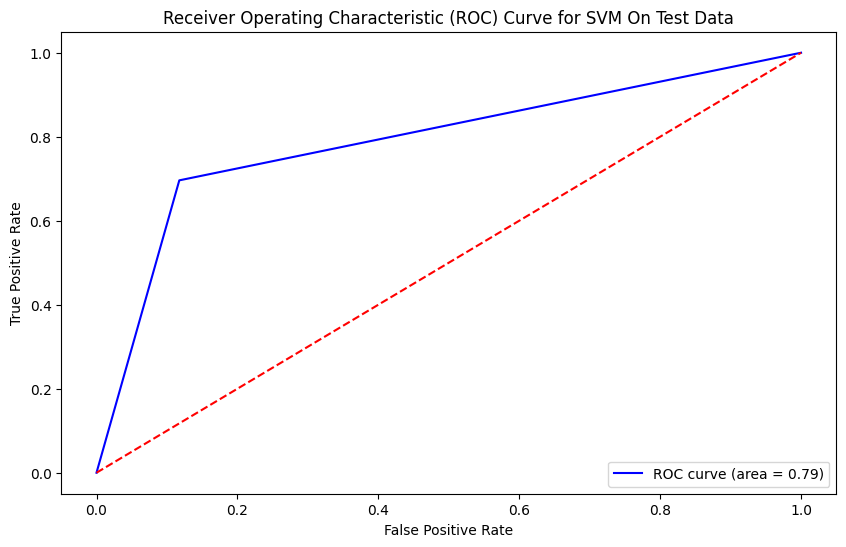

AUC: 0.7893044919802022


In [126]:
# Plotting the ROC Curve
plt.figure(figsize=(10, 6))
plt.plot(fpr, tpr, color='blue', label='ROC curve (area = %0.2f)' % roc_auc_test_svm)
plt.plot([0, 1], [0, 1], color='red', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve for SVM On Test Data')
plt.legend(loc="lower right")
plt.savefig('ROC Curve for SVM On Test Data')
plt.show()
print(f"AUC: {roc_auc_test_svm}")

# SVM with GrdisSearchCV

In [ ]:
# defining parameter range
svm_param_grid = {'C': [0.1, 1, 10, 100, 1000],
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
              'kernel': ['rbf'] }

In [ ]:
svm_grid_search = GridSearchCV(svm, svm_param_grid, refit = True, verbose = 3, n_jobs = -1).fit(X_train, y_train)

Fitting 5 folds for each of 25 candidates, totalling 125 fits


In [ ]:
# Print the best parameters and the best score
print(f"Best parameters: {svm_grid_search.best_params_}")
print(f"Best cross-validation score: {svm_grid_search.best_score_}")

Best parameters: {'C': 1, 'gamma': 0.1, 'kernel': 'rbf'}
Best cross-validation score: 0.7444587444270678


In [ ]:
# print how our model looks after hyper-parameter tuning
print(svm_grid_search.best_estimator_)

SVC(C=1, gamma=0.1, random_state=50)


In [ ]:
# print how our model looks after hyper-parameter tuning
print(svm_grid_search.best_params_)

{'C': 1, 'gamma': 0.1, 'kernel': 'rbf'}


In [ ]:
svm_grid = SVC(random_state = 50, C = 1, gamma = 0.1, kernel=  'rbf').fit(X_train, y_train)

In [ ]:
y_pred_svmp = svm_grid.predict(X_train)
y_pred_svmp_test = svm_grid.predict(X_test)

In [ ]:
# Classification Report for train data
class_report_svmp = classification_report(y_train, y_pred_svmp)
print("Classification Report:\n", class_report_svmp)

Classification Report:
               precision    recall  f1-score   support

           0       0.80      0.87      0.84      7242
           1       0.75      0.65      0.70      4396

    accuracy                           0.79     11638
   macro avg       0.78      0.76      0.77     11638
weighted avg       0.79      0.79      0.78     11638



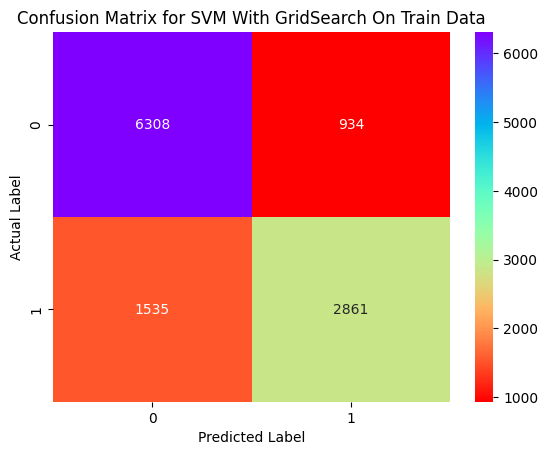

In [ ]:
# Confusion Matrix for train data
sns.heatmap(confusion_matrix(y_train, y_pred_svmp),annot=True,fmt='d',cbar=True,cmap='rainbow_r')
plt.title('Confusion Matrix for SVM With GridSearch On Train Data')
plt.xlabel('Predicted Label')
plt.ylabel('Actual Label')
plt.savefig("Confusion Matrix for SVM With GridSearch On Train Data")
plt.show()

In [ ]:
# Classification Report test data
class_report_svmp_test = classification_report(y_test, y_pred_svmp_test)
print("Classification Report:\n", class_report_svmp_test)

Classification Report:
               precision    recall  f1-score   support

           0       0.76      0.83      0.80      3061
           1       0.69      0.59      0.64      1927

    accuracy                           0.74      4988
   macro avg       0.73      0.71      0.72      4988
weighted avg       0.74      0.74      0.73      4988



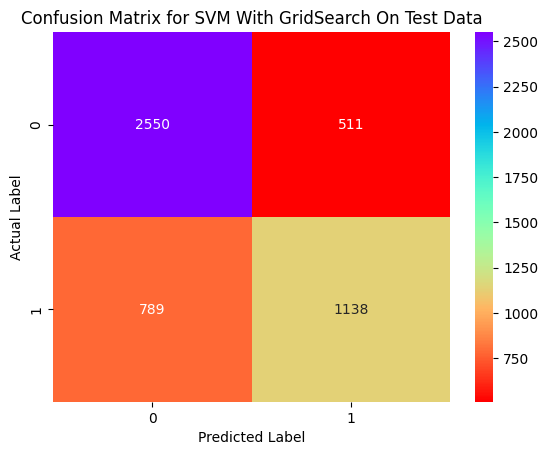

In [ ]:
# Confusion Matrix for test data
sns.heatmap(confusion_matrix(y_test, y_pred_svmp_test),annot=True,fmt='d',cbar=True,cmap='rainbow_r')
plt.title('Confusion Matrix for SVM With GridSearch On Test Data')
plt.xlabel('Predicted Label')
plt.ylabel('Actual Label')
plt.savefig("Confusion Matrix for SVM With GridSearch On Test Data")
plt.show()

In [ ]:
# ROC Curve and AUC for train set data
fpr, tpr, _ = roc_curve(y_train, y_pred_svmp)
roc_auc_svmp = auc(fpr, tpr)

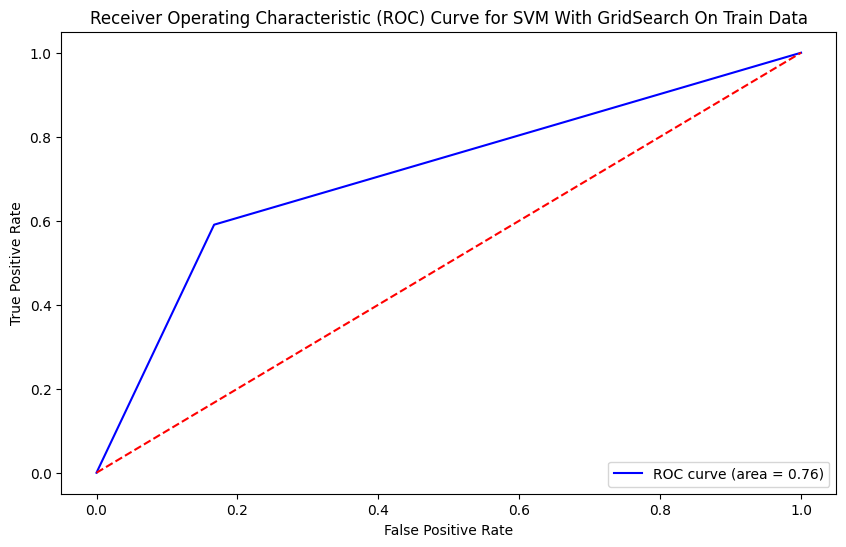

AUC: 0.7609245142391755


In [ ]:
# Plotting the ROC Curve
plt.figure(figsize=(10, 6))
plt.plot(fpr, tpr, color='blue', label='ROC curve (area = %0.2f)' % roc_auc_svmp)
plt.plot([0, 1], [0, 1], color='red', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve for SVM With GridSearch On Train Data')
plt.legend(loc="lower right")
plt.savefig('ROC Curve for SVM With GridSearch On Train Data')
plt.show()
print(f"AUC: {roc_auc_svmp}")

In [ ]:
# ROC Curve and AUC for test set data
fpr, tpr, _ = roc_curve(y_test, y_pred_svmp_test)
roc_auc_test_svmp = auc(fpr, tpr)

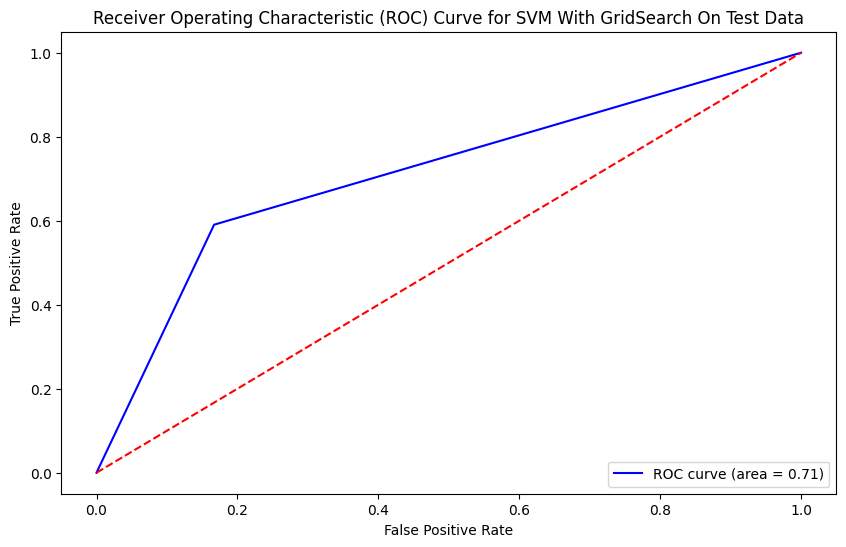

AUC: 0.7118081792007421


In [ ]:
# Plotting the ROC Curve
plt.figure(figsize=(10, 6))
plt.plot(fpr, tpr, color='blue', label='ROC curve (area = %0.2f)' % roc_auc_test_svmp)
plt.plot([0, 1], [0, 1], color='red', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve for SVM With GridSearch On Test Data')
plt.legend(loc="lower right")
plt.savefig('ROC Curve for SVM With GridSearch On Test Data')
plt.show()
print(f"AUC: {roc_auc_test_svmp}")

# Neural Network

In [127]:
nn = MLPClassifier(random_state = 50).fit(X_train, y_train)

In [128]:
y_pred_nn = nn.predict(X_train)
y_pred_nn_test = nn.predict(X_test)

In [129]:
y_pred_proba_nn = nn.predict_proba(X_train)[:, 1]
y_pred_proba_test_nn = nn.predict_proba(X_test)[:, 1]

In [130]:
# Classification Report for train data
class_report_nn = classification_report(y_train, y_pred_nn)
print("Classification Report:\n", class_report_nn)

Classification Report:
               precision    recall  f1-score   support

           0       0.87      0.87      0.87     52565
           1       0.78      0.78      0.78     31008

    accuracy                           0.84     83573
   macro avg       0.83      0.82      0.83     83573
weighted avg       0.84      0.84      0.84     83573



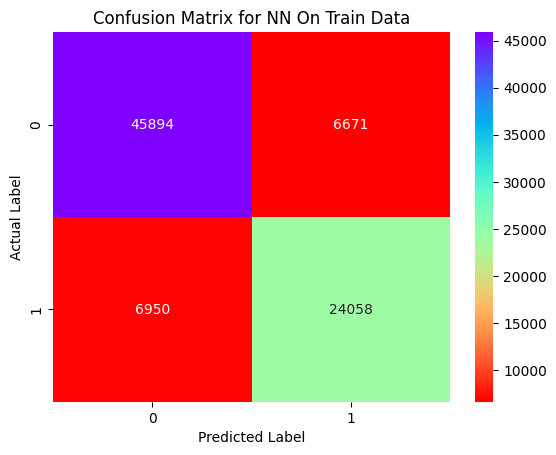

In [131]:
# Confusion Matrix for train data
sns.heatmap(confusion_matrix(y_train, y_pred_nn),annot=True,fmt='d',cbar=True,cmap='rainbow_r')
plt.title('Confusion Matrix for NN On Train Data')
plt.xlabel('Predicted Label')
plt.ylabel('Actual Label')
plt.savefig("Confusion Matrix for NN On Train Data")
plt.show()

In [132]:
# ROC Curve and AUC for train set data
fpr, tpr, _ = roc_curve(y_train, y_pred_proba_nn)
roc_auc_nn = auc(fpr, tpr)

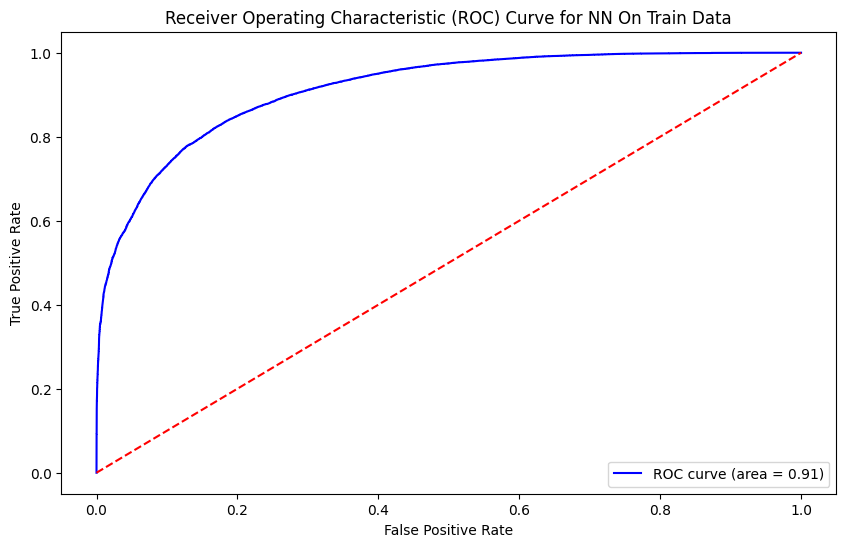

AUC: 0.9131872744266595


In [133]:
# Plotting the ROC Curve
plt.figure(figsize=(10, 6))
plt.plot(fpr, tpr, color='blue', label='ROC curve (area = %0.2f)' % roc_auc_nn)
plt.plot([0, 1], [0, 1], color='red', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve for NN On Train Data')
plt.legend(loc="lower right")
plt.savefig('ROC Curve for NN On Train Data')
plt.show()
print(f"AUC: {roc_auc_nn}")

In [134]:
# Classification Report test data
class_report_nn_test = classification_report(y_test, y_pred_nn_test)
print("Classification Report:\n", class_report_nn_test)

Classification Report:
               precision    recall  f1-score   support

           0       0.86      0.86      0.86     22601
           1       0.76      0.76      0.76     13216

    accuracy                           0.82     35817
   macro avg       0.81      0.81      0.81     35817
weighted avg       0.82      0.82      0.82     35817



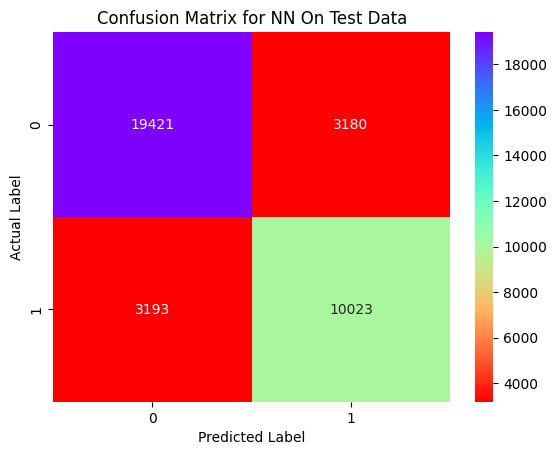

In [135]:
# Confusion Matrix for test data
sns.heatmap(confusion_matrix(y_test, y_pred_nn_test),annot=True,fmt='d',cbar=True,cmap='rainbow_r')
plt.title('Confusion Matrix for NN On Test Data')
plt.xlabel('Predicted Label')
plt.ylabel('Actual Label')
plt.savefig("Confusion Matrix for NN On Test Data")
plt.show()

In [136]:
# ROC Curve and AUC for testmset data
fpr, tpr, _ = roc_curve(y_test, y_pred_proba_test_nn)
roc_auc_test_nn = auc(fpr, tpr)

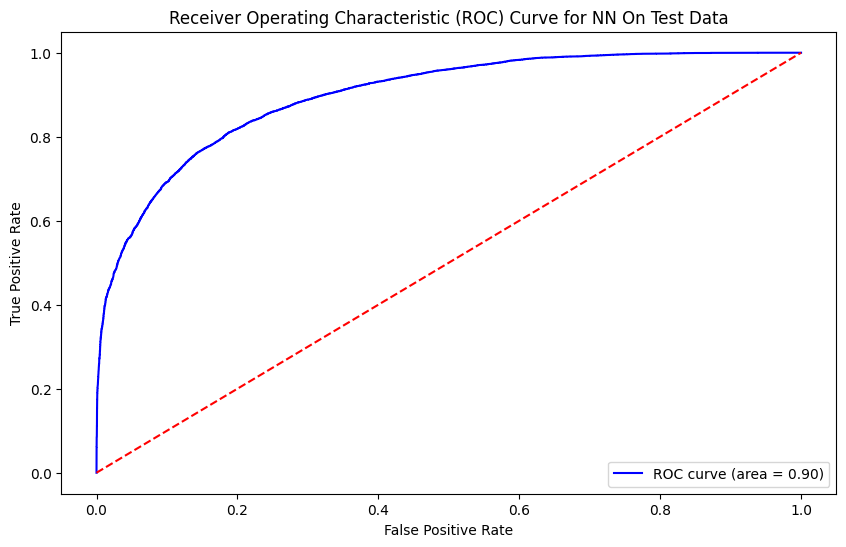

AUC: 0.8976502541644378


In [137]:
# Plotting the ROC Curve
plt.figure(figsize=(10, 6))
plt.plot(fpr, tpr, color='blue', label='ROC curve (area = %0.2f)' % roc_auc_test_nn)
plt.plot([0, 1], [0, 1], color='red', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve for NN On Test Data')
plt.legend(loc="lower right")
plt.savefig('ROC Curve for NN On Test Data')
plt.show()
print(f"AUC: {roc_auc_test_nn}")

# NN GSCV

In [ ]:
# Define the parameter grid for GridSearchCV
param_grid_nn = {
    'hidden_layer_sizes': [(50,), (100,), (150,)],
    'activation': ['tanh', 'relu'],
    'solver': ['sgd', 'adam'],
    'alpha': [0.0001, 0.05],
    'learning_rate': ['constant', 'adaptive'],
}

In [ ]:
# Initialize GridSearchCV
nn_grid_search = GridSearchCV(nn, param_grid_nn, cv=3, n_jobs=-1, verbose=2).fit(X_train, y_train)

Fitting 3 folds for each of 48 candidates, totalling 144 fits


In [ ]:
# Print the best parameters and the best score
print(f"Best parameters: {nn_grid_search.best_params_}")
print(f"Best cross-validation score: {nn_grid_search.best_score_}")

Best parameters: {'activation': 'tanh', 'alpha': 0.05, 'hidden_layer_sizes': (150,), 'learning_rate': 'constant', 'solver': 'adam'}
Best cross-validation score: 0.7381853473058295


In [ ]:
nn_p = MLPClassifier(random_state = 50, activation = 'tanh', alpha = 0.05, hidden_layer_sizes = (150,),learning_rate = 'constant', solver = 'adam').fit(X_train, y_train)

In [ ]:
y_pred_nnp = nn_p.predict(X_train)
y_pred_nnp_test = nn_p.predict(X_test)

In [ ]:
y_pred_proba_nnp = nn_p.predict_proba(X_train)[:, 1]
y_pred_proba_test_nnp = nn_p.predict_proba(X_test)[:, 1]

In [ ]:
# Classification Report for train data
class_report_nnp = classification_report(y_train, y_pred_nnp)
print("Classification Report:\n", class_report_nnp)

Classification Report:
               precision    recall  f1-score   support

           0       0.81      0.85      0.83      7242
           1       0.73      0.68      0.70      4396

    accuracy                           0.78     11638
   macro avg       0.77      0.76      0.77     11638
weighted avg       0.78      0.78      0.78     11638



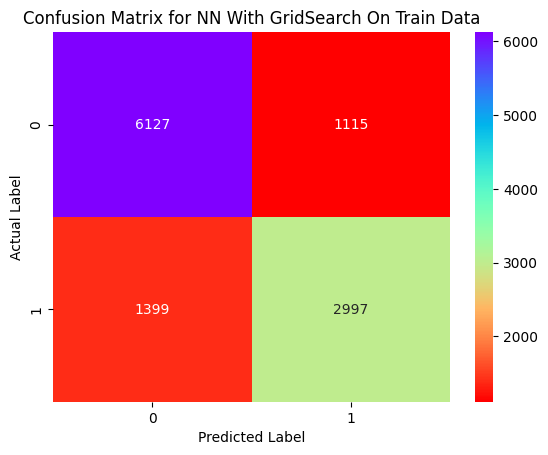

In [ ]:
# Confusion Matrix for train data
sns.heatmap(confusion_matrix(y_train, y_pred_nnp),annot=True,fmt='d',cbar=True,cmap='rainbow_r')
plt.title('Confusion Matrix for NN With GridSearch On Train Data')
plt.xlabel('Predicted Label')
plt.ylabel('Actual Label')
plt.savefig("Confusion Matrix for NN With GridSearch On Train Data")
plt.show()

In [ ]:
# ROC Curve and AUC for train set data
fpr, tpr, _ = roc_curve(y_train, y_pred_proba_nnp)
roc_auc_nnp = auc(fpr, tpr)

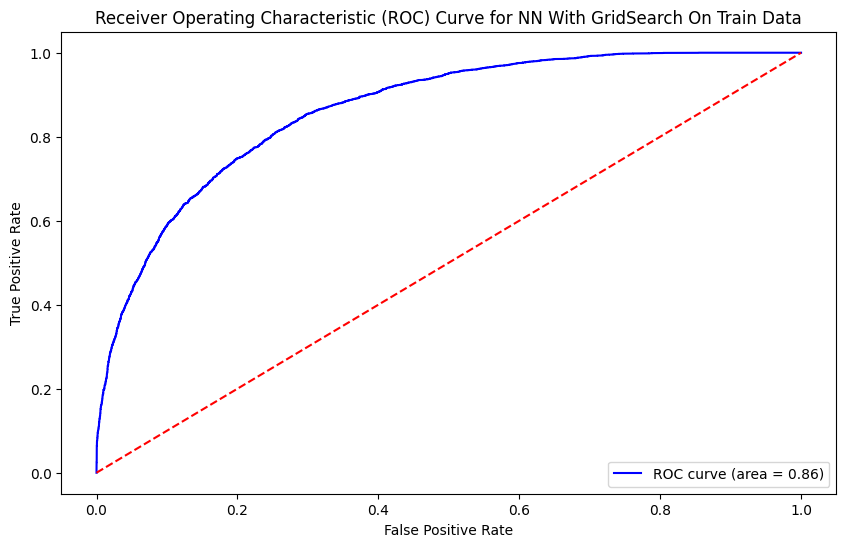

AUC: 0.8636453101021516


In [ ]:
# Plotting the ROC Curve
plt.figure(figsize=(10, 6))
plt.plot(fpr, tpr, color='blue', label='ROC curve (area = %0.2f)' % roc_auc_nnp)
plt.plot([0, 1], [0, 1], color='red', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve for NN With GridSearch On Train Data')
plt.legend(loc="lower right")
plt.savefig('ROC Curve for NN With GridSearch On Train Data')
plt.show()
print(f"AUC: {roc_auc_nnp}")

In [ ]:
# Classification Report test data
class_report_nnp_test = classification_report(y_test, y_pred_nnp_test)
print("Classification Report:\n", class_report_nnp_test)

Classification Report:
               precision    recall  f1-score   support

           0       0.76      0.80      0.78      3061
           1       0.65      0.60      0.62      1927

    accuracy                           0.72      4988
   macro avg       0.71      0.70      0.70      4988
weighted avg       0.72      0.72      0.72      4988



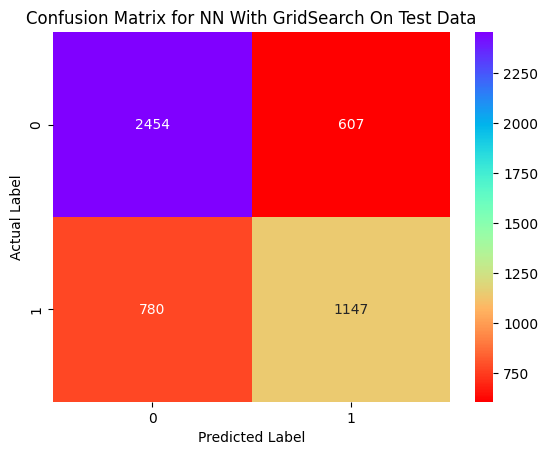

In [ ]:
# Confusion Matrix for test data
sns.heatmap(confusion_matrix(y_test, y_pred_nnp_test),annot=True,fmt='d',cbar=True,cmap='rainbow_r')
plt.title('Confusion Matrix for NN With GridSearch On Test Data')
plt.xlabel('Predicted Label')
plt.ylabel('Actual Label')
plt.savefig("Confusion Matrix for NN With GridSearch On Test Data")
plt.show()

In [ ]:
# ROC Curve and AUC for testmset data
fpr, tpr, _ = roc_curve(y_test, y_pred_proba_test_nnp)
roc_auc_test_nnp = auc(fpr, tpr)

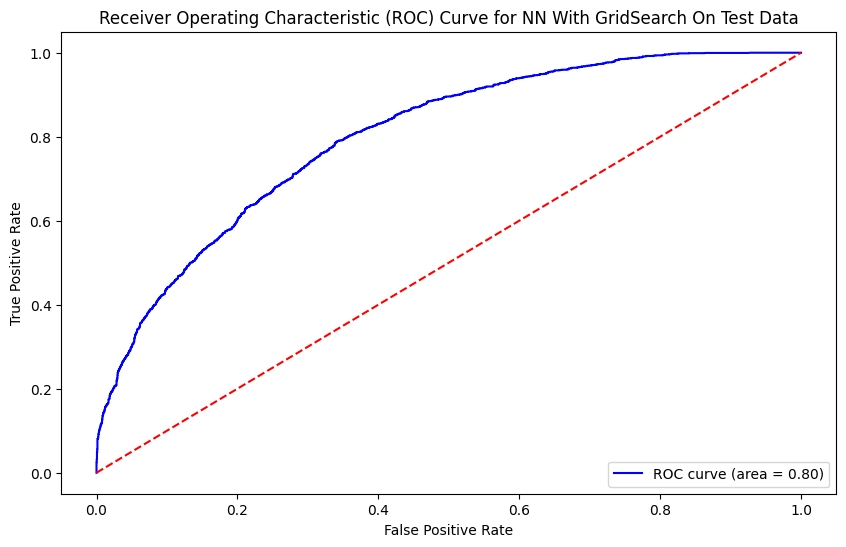

AUC: 0.7993528745299477


In [ ]:
# Plotting the ROC Curve
plt.figure(figsize=(10, 6))
plt.plot(fpr, tpr, color='blue', label='ROC curve (area = %0.2f)' % roc_auc_test_nnp)
plt.plot([0, 1], [0, 1], color='red', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve for NN With GridSearch On Test Data')
plt.legend(loc="lower right")
plt.savefig('ROC Curve for NN With GridSearch On Test Data')
plt.show()
print(f"AUC: {roc_auc_test_nnp}")

# Linear Discriminant Analysis

In [138]:
ldr = LinearDiscriminantAnalysis().fit(X_train, y_train)

In [139]:
y_pred_ldr = ldr.predict(X_train)
y_pred_ldrtest = ldr.predict(X_test)

In [140]:
y_pred_proba_ldr = ldr.predict_proba(X_train)[:, 1]
y_pred_proba_test_ldr = ldr.predict_proba(X_test)[:, 1]

In [141]:
# Classification Report for train data
class_report_ldr = classification_report(y_train, y_pred_ldr)
print("Classification Report:\n", class_report_ldr)

Classification Report:
               precision    recall  f1-score   support

           0       0.77      0.85      0.81     52565
           1       0.70      0.58      0.63     31008

    accuracy                           0.75     83573
   macro avg       0.74      0.71      0.72     83573
weighted avg       0.75      0.75      0.74     83573



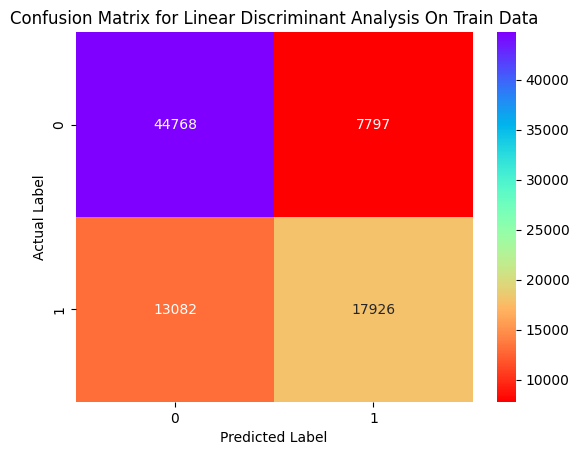

In [142]:
# Confusion Matrix for train data
sns.heatmap(confusion_matrix(y_train, y_pred_ldr),annot=True,fmt='d',cbar=True,cmap='rainbow_r')
plt.title('Confusion Matrix for Linear Discriminant Analysis On Train Data')
plt.xlabel('Predicted Label')
plt.ylabel('Actual Label')
plt.savefig("Confusion Matrix for Linear Discriminant Analysis On Train Data")
plt.show()

In [143]:
# ROC Curve and AUC for train set data
fpr, tpr, _ = roc_curve(y_train, y_pred_proba_ldr)
roc_auc_ldr = auc(fpr, tpr)

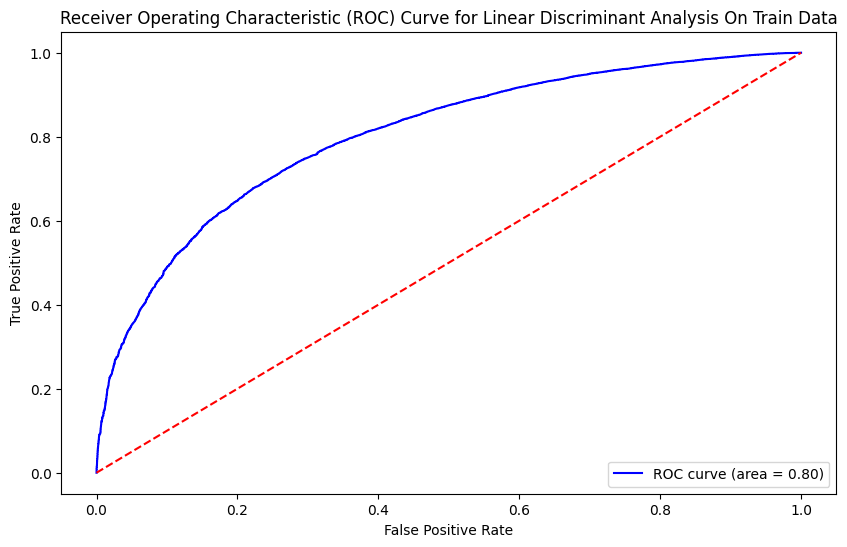

AUC: 0.8013884076837592


In [144]:
# Plotting the ROC Curve
plt.figure(figsize=(10, 6))
plt.plot(fpr, tpr, color='blue', label='ROC curve (area = %0.2f)' % roc_auc_ldr)
plt.plot([0, 1], [0, 1], color='red', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve for Linear Discriminant Analysis On Train Data')
plt.legend(loc="lower right")
plt.savefig('ROC Curve for Linear Discriminant Analysis On Train Data')
plt.show()
print(f"AUC: {roc_auc_ldr}")

In [145]:
# Classification Report test data
class_report_ldr_test = classification_report(y_test, y_pred_ldrtest)
print("Classification Report:\n", class_report_ldr_test)

Classification Report:
               precision    recall  f1-score   support

           0       0.77      0.85      0.81     22601
           1       0.69      0.57      0.62     13216

    accuracy                           0.75     35817
   macro avg       0.73      0.71      0.72     35817
weighted avg       0.74      0.75      0.74     35817



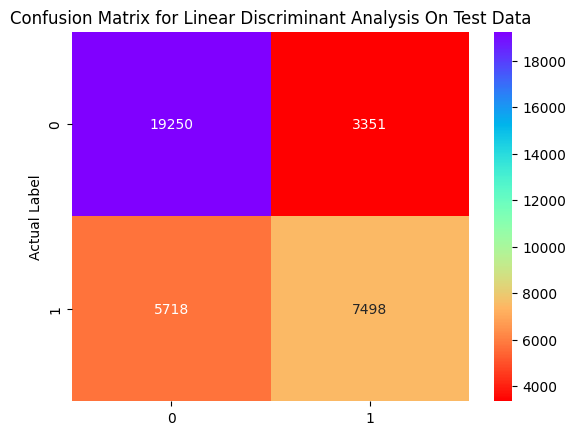

In [146]:
# Confusion Matrix for test data
conf_matrix_ldr_test = confusion_matrix(y_test, y_pred_ldrtest)
sns.heatmap(confusion_matrix(y_test, y_pred_ldrtest),annot=True,fmt='d',cbar=True,cmap='rainbow_r')
plt.title('Confusion Matrix for Linear Discriminant Analysis On Test Data')
plt.ylabel('Actual Label')
plt.savefig("Confusion Matrix for Linear Discriminant Analysis On Test Data")
plt.show()

In [147]:
# ROC Curve and AUC for testmset data
fpr, tpr, _ = roc_curve(y_test, y_pred_proba_test_ldr)
roc_auc_test_ldr = auc(fpr, tpr)

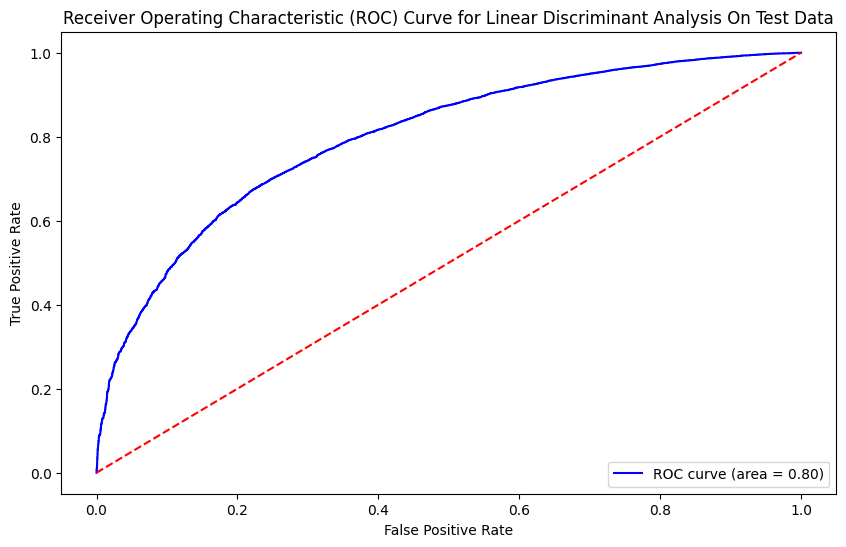

AUC: 0.7988995513735331


In [148]:
# Plotting the ROC Curve
plt.figure(figsize=(10, 6))
plt.plot(fpr, tpr, color='blue', label='ROC curve (area = %0.2f)' % roc_auc_test_ldr)
plt.plot([0, 1], [0, 1], color='red', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve for Linear Discriminant Analysis On Test Data')
plt.legend(loc="lower right")
plt.savefig('ROC Curve for Linear Discriminant Analysis On Test Data')
plt.show()
print(f"AUC: {roc_auc_test_ldr}")